# MARKETING SCIENCE GROUP ASSIGNMENT CODES

In [24]:
# Load libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import gower
from sklearn.decomposition import PCA

# kmodes can only be run on categorical data 
# k prototypes is used to run a mixture of numerical and categorical data
from kmodes.kprototypes import KPrototypes 
from kmodes.kmodes import KModes

#Here we import the core modules used in our algorithm
from datetime import datetime 
import statsmodels.api as sm
loopCounter = 0

In [25]:
# Load the data 
num_city_df = pd.read_csv("numerical_city_hotel_data.csv")

In [26]:
# View the first 5 rows of the data 
num_city_df.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,season_reservation_status_date_Autumn,season_reservation_status_date_Spring,season_reservation_status_date_Summer,season_reservation_status_date_Winter
0,0,1,100,27,0,2,2,0.0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,79,27,0,3,2,0.0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,3,27,0,3,1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,3,1,63,27,1,3,1,0.0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,4,1,62,27,2,3,2,0.0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
# Remove the unnamed column 
num_city_df = num_city_df.drop(num_city_df.columns[[0]], axis=1) 

In [28]:
# Check the shape of the dataframe 
num_city_df.shape

(12987, 108)

In [29]:
# Check that there are no categorical attributes 
num_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Columns: 108 entries, is_canceled to season_reservation_status_date_Winter
dtypes: float64(2), int64(106)
memory usage: 10.7 MB


In [30]:
# Change the children floats into integers 
# We don't want to change the adr (average daily rate)
'num_city_df IS THE NUMERICAL DATASET BUT WITH ADR AS A FLOAT'
num_city_df["children"] = num_city_df['children'].astype('int')

# Check the information on the attributes now 
num_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Columns: 108 entries, is_canceled to season_reservation_status_date_Winter
dtypes: float64(1), int64(107)
memory usage: 10.7 MB


### DATA CLEANING 

In [181]:
def clean_data():
# Import CSV file into pandas dataframe
    hotel_data = pd.read_csv('hotel_bookings.csv')
    hotel_data.head()

    # Firstly must concatenate dates into YY/MM/DD date time formate
    hotel_data['date'] = hotel_data.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(x['arrival_date_year'], x['arrival_date_month'], x['arrival_date_day_of_month']), "%Y %B %d %H:%M:%S"), axis = 1)

    # Set Date as the index for each dataset
    hotel_data = hotel_data.set_index('date')
    hotel_data.head()

    # Secondly, remove row entries where ADR is zero
    df = hotel_data
    df.drop(df[df['adr'] == 0].index, inplace = True)
    hotel_data1 = df


    # Thirdly, group data by hotel region
    mask = hotel_data1.hotel.str.contains("Resort Hotel")
    resort_hotel_data = hotel_data1[mask]
    city_hotel_data = hotel_data1[~mask]

    # Fourthly Remove Company and Agent columns
    del resort_hotel_data['agent']
    del resort_hotel_data['company']
    del city_hotel_data['agent']
    del city_hotel_data['company']

    # Remove Redundant Arrival Year, Arrival Month, and Arrival Day columns
    del resort_hotel_data['arrival_date_year']
    del resort_hotel_data['arrival_date_month']
    del resort_hotel_data['arrival_date_day_of_month']
    del city_hotel_data['arrival_date_year']
    del city_hotel_data['arrival_date_month']
    del city_hotel_data['arrival_date_day_of_month']

    # Remove NA's 
    resort_hotel_data_cleaned = resort_hotel_data.dropna()
    city_hotel_data_cleaned = city_hotel_data.dropna()

    # Reset Indexes
    resort_hotel_data_cleaned.reset_index()
    city_hotel_data_cleaned.reset_index()

    resort_hotel_data_cleaned.to_csv('resort_hotel_data_cleaned.csv')
    city_hotel_data_cleaned.to_csv('city_hotel_data_cleaned.csv')

clean_data()

### DATA VISUALISATIONS 

In [32]:
# Load the cleaned resort hotel data 
resort_df = pd.read_csv("resort_hotel_data_cleaned.csv")
resort_df.head()
city_df = pd.read_csv("city_hotel_data_cleaned.csv")
city_df.head()

,date,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,2015-07-02,City Hotel,1,100,27,0,2,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
1,2015-07-02,City Hotel,1,79,27,0,3,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-06-25
2,2015-07-02,City Hotel,0,3,27,0,3,1,0.0,0,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
3,2015-07-02,City Hotel,1,63,27,1,3,1,0.0,0,...,A,0,No Deposit,0,Transient,68.00,0,0,Canceled,2015-06-25
4,2015-07-02,City Hotel,1,62,27,2,3,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02


In [33]:
# Load the cleaned city hotel data 
city_df = pd.read_csv("city_hotel_data_cleaned.csv")
city_df.head()

,date,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,2015-07-02,City Hotel,1,100,27,0,2,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
1,2015-07-02,City Hotel,1,79,27,0,3,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-06-25
2,2015-07-02,City Hotel,0,3,27,0,3,1,0.0,0,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
3,2015-07-02,City Hotel,1,63,27,1,3,1,0.0,0,...,A,0,No Deposit,0,Transient,68.00,0,0,Canceled,2015-06-25
4,2015-07-02,City Hotel,1,62,27,2,3,2,0.0,0,...,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02


In [34]:
#Cancelations vs month (city hotel)

city_df['month'] = pd.DatetimeIndex(city_df['date']).month

listofcancelsCity=list()
listofresCity=list()

for i in range (12):
    cancelCity=0
    resCity=0
    for j in range (12987):
        if city_df.loc[j]['month']==i+1:
            resCity=resCity+1
            if city_df.loc[j]['is_canceled']==1:
                cancelCity=cancelCity+1
    listofresCity.append(resCity)
    listofcancelsCity.append(cancelCity)
    
print("reservations each month=", listofresCity)
print("cancelations each month=", listofcancelsCity)        

reservations each month= [986, 600, 944, 1230, 1214, 1072, 1991, 2435, 1161, 548, 327, 479]
cancelations each month= [350, 198, 370, 472, 580, 469, 842, 916, 512, 214, 73, 187]


In [35]:
#cancelation rate (City hotel)

cancelrateCity=list()

for i in range (12):
    cancelrateCity.append(listofcancelsCity[i]/listofresCity[i]*100)

print(cancelrateCity)    

[35.496957403651116, 33.0, 39.19491525423729, 38.3739837398374, 47.77594728171334, 43.75, 42.290306378704166, 37.61806981519507, 44.09991386735573, 39.05109489051095, 22.32415902140673, 39.03966597077244]


In [36]:
#Cancelations vs month (Resort hotel)

resort_df['month'] = pd.DatetimeIndex(resort_df['date']).month

listofcancelsResort=list()
listofresResort=list()

for i in range (12):
    cancelResort=0
    resResort=0
    for j in range (6737):
        if resort_df.loc[j]['month']==i+1:
            resResort=resResort+1
            if resort_df.loc[j]['is_canceled']==1:
                cancelResort=cancelResort+1
    listofresResort.append(resResort)
    listofcancelsResort.append(cancelResort)
    
print("reservations each month=", listofresResort)
print("cancelations each month=", listofcancelsResort)        

reservations each month= [620, 206, 406, 621, 447, 539, 1302, 1361, 487, 226, 226, 296]
cancelations each month= [98, 42, 89, 220, 148, 143, 404, 458, 120, 84, 35, 70]


In [37]:
#cancelation rate (Resort hotel)

cancelrateResort=list()

for i in range (12):
    cancelrateResort.append(listofcancelsResort[i]/listofresResort[i]*100)

print(cancelrateResort) 

[15.806451612903224, 20.388349514563107, 21.921182266009854, 35.42673107890499, 33.1096196868009, 26.53061224489796, 31.02918586789555, 33.65172667156502, 24.64065708418891, 37.16814159292036, 15.486725663716813, 23.64864864864865]


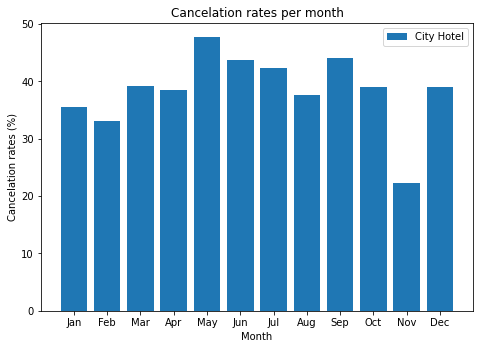

In [38]:
#Plot City hotel cancelation rates per month

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_axis = np.arange(len(months))
plt.bar(months, cancelrateCity, label = 'City Hotel')
ax.set_xlabel('Month')
ax.set_ylabel('Cancelation rates (%)')
ax.set_title('Cancelation rates per month')
plt.legend()
plt.show()

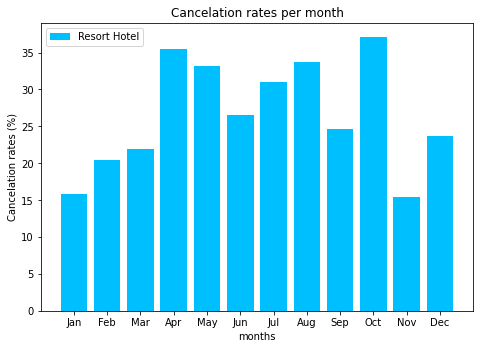

In [39]:
#Plot Resort cancelation rates per month

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_axis = np.arange(len(months))
plt.bar(months, cancelrateResort, label = 'Resort Hotel',  color="deepskyblue")
ax.set_xlabel('months')
ax.set_ylabel('Cancelation rates (%)')
ax.set_title('Cancelation rates per month')
plt.legend()
plt.show()

In [40]:
#Create a dataframe holding the difference in terms of cancellation rate
difference = [x1 - x2 for (x1, x2) in zip(cancelrateCity, cancelrateResort)]
print (difference)

[19.690505790747892, 12.611650485436893, 17.273732988227433, 2.9472526609324063, 14.666327594912445, 17.21938775510204, 11.261120510808617, 3.9663431436300485, 19.459256783166822, 1.8829532975905963, 6.837433357689916, 15.39101732212379]


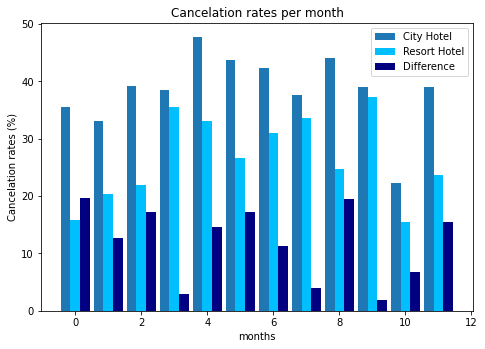

In [41]:
#Plot both City and Resort hotels cancelation rates per month

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
X_axis = np.arange(len(months))
plt.bar(X_axis - 0.3, cancelrateCity, 0.3, label = 'City Hotel')
plt.bar(X_axis + 0, cancelrateResort, 0.3, label = 'Resort Hotel', color="deepskyblue")
plt.bar(X_axis + 0.3, difference, 0.3, label = 'Difference', color="navy")
ax.set_xlabel('months')
ax.set_ylabel('Cancelation rates (%)')
ax.set_title('Cancelation rates per month')
plt.legend()
plt.show()

In [42]:
#Average ADR for City hotel 

totalAdrCity=list()

for i in range (12):
    adrCity=0
    for j in range (12987):
        if city_df.loc[j]['month']==i+1:
            adrCity=adrCity+city_df.loc[j]['adr']
    totalAdrCity.append(adrCity)
    
print(totalAdrCity) 


avgAdrCity=list()

for i in range (12):
    avgAdrCity.append(totalAdrCity[i]/listofresCity[i])

[82009.94999999997, 51706.32000000002, 99080.77000000002, 149133.78999999995, 160871.4800000004, 130394.29000000014, 234886.10000000102, 303020.1600000007, 143608.15000000002, 55695.5999999999, 31478.20999999999, 44183.05999999996]


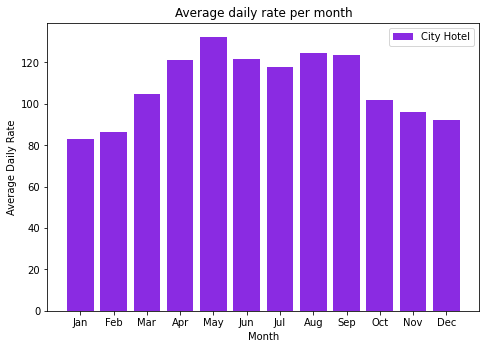

In [43]:
#Plot average ADR for City hotel for each month
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, avgAdrCity, label = 'City Hotel', color = "blueviolet")
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average daily rate per month')
plt.legend()
plt.show()


In [44]:
#Average ADR for Resort hotel 

totalAdrResort=list()

for i in range (12):
    adrResort=0
    for j in range (6737):
        if resort_df.loc[j]['month']==i+1:
            adrResort=adrResort+resort_df.loc[j]['adr']
    totalAdrResort.append(adrResort)
    
print(totalAdrResort) 

avgAdrResort=list()

for i in range (12):
    avgAdrResort.append(totalAdrResort[i]/listofresResort[i])

[32850.799999999996, 10957.8, 25706.410000000007, 54974.98999999993, 40105.639999999934, 63578.63999999995, 208382.29000000004, 264823.83000000037, 50264.75999999999, 12872.910000000007, 10719.439999999986, 20341.8]


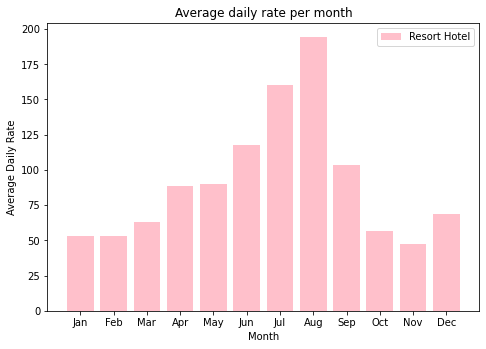

In [45]:
#Plot average ADR for Resort hotel for each month

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_axis = np.arange(len(months))
plt.bar(months, avgAdrResort, label = 'Resort Hotel',  color="pink")
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average daily rate per month')
plt.legend()
plt.show()

In [46]:
#Create a dataframe holding the difference in terms of average daily rate
difference2 = [y1 - y2 for (y1, y2) in zip(avgAdrCity, avgAdrResort)]
print(difference2)

[30.18923019040762, 32.9839961165049, 41.64216200843283, 32.72042979458787, 42.79178524964205, 3.679804069864261, -42.07390908473644, -70.13673310330157, 20.48043743710288, 44.67452780828091, 48.83248870125304, 23.51791147096985]


In [47]:
print(avgAdrCity)

[83.1743914807302, 86.17720000000004, 104.95844279661019, 121.24698373983736, 132.51357495881416, 121.63646455223893, 117.97393269713763, 124.44359753593457, 123.69349698535747, 101.63430656934288, 96.26363914373086, 92.24020876826714]


In [48]:
print(avgAdrResort)

[52.98516129032257, 53.193203883495144, 63.31628078817736, 88.52655394524949, 89.72178970917211, 117.95666048237467, 160.04784178187407, 194.58033063923614, 103.21305954825459, 56.959778761061976, 47.431150442477815, 68.72229729729729]


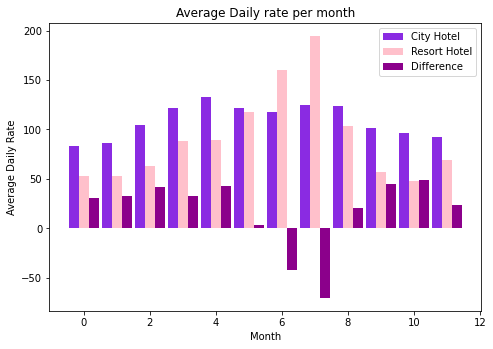

In [49]:
#Plot average ADR for City and Resort hotels for each month

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_axis = np.arange(len(months))
plt.bar(X_axis - 0.3, avgAdrCity, 0.3, label = 'City Hotel', color="blueviolet")
plt.bar(X_axis + 0, avgAdrResort, 0.3, label = 'Resort Hotel', color="pink")
plt.bar(X_axis + 0.3, difference2, 0.3, label = 'Difference', color="darkmagenta")
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average Daily rate per month')
plt.legend()
plt.show()

In [50]:
#ADDITIONAL NOTES (from correlation tables)

#CITY HOTEL
# We can see that the attributes most correlated with cancelled bookings are lead-time (0.297), previous cancelations 
# (0.154) and the number of adults in the booking (0.057)

#The attributes with the highest negative correlation to cancelled bookings are special requests (-0.261), 
#parking spaces (-0.132) and repeated guests (-0.041)

#RESORT HOTEL
# We can see that the attributes most correlated with cancelled bookings are lead-time (0.201), number of children 
# (0.114), adr (0.135) and the number of previous cancellations (0.109)

#The attributes with the highest negative correlation to cancelled bookings are parking spaces (-0.246), 
#special requests (-0.114), and repeated guests (-0.098)

### CORRELATION MATRICES

In [51]:
# Install package 
!pip install plotly

In [52]:
# Load libraries 

import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Correlation matrices only work on numerical data. Thus, the first step is to create an all numerical dataset using the one-hot encoding method. This will create a numerical dataset for both the city and resort hotel. This will also be needed to visualise the clusters in the k-prototype algorithm.

In [53]:
# Create a function to get numerical datasets 

def get_numerical_function(df_2):

    # Change the dates in the df dataframe to only have the month 
    df_2['m_date'] = pd.DatetimeIndex(df_2['date']).month
    df_2['m_res_status_date'] = pd.DatetimeIndex(df_2['reservation_status_date']).month
    #________________________

    # Change the month number to seasons 
    def find_season(month):
        season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month.get(month)

    # Change the arrival date month to arrival date season 
    season_list_date = []
    for month in df_2['m_date']:
        season_date = find_season(month)
        season_list_date.append(season_date)

    df_2['season_arrival_date'] = season_list_date

    # Change the reservation status date month to reservation status date season 
    season_list_res_date = []
    for month in df_2['m_res_status_date']:
        season_res_date = find_season(month)
        season_list_res_date.append(season_res_date)

    df_2['season_reservation_status_date'] = season_list_res_date
    #________________________

    # Remove the original date and reservation status date columns 
    df_2 = df_2.drop(df_2.columns[[0, 27, 28, 29]], axis=1) 

    # shift column 'season_arrival_date' to first position
    first_column = df_2.pop('season_arrival_date')

    # insert column using insert(position,column_name,
    # first_column) function
    df_2.insert(0, 'season_arrival_date', first_column)

    #________________________

    # Create a dataframe with only categorical attributes 
    df_categorical_2 = df_2.select_dtypes(include='object')

    # Get the names of each column in the categorical dataframe 
    cat_col_names_2 = list(df_categorical_2.columns.values)

    #________________________

    # Determine the count of each country 
    country_counts = df_categorical_2['country'].value_counts()


    # Create a mask of all countries that have 10 or less counts and label this as other 
    mask = df_2['country'].isin(country_counts[country_counts < 11].index)
    df_2['country'][mask] = 'Other'


    #________________________

    # Run the function for encoding the dataset 
    def encode_and_bind(original_dataframe, feature_to_encode):
        dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
        res = pd.concat([original_dataframe, dummies], axis=1)
        res = res.drop([feature_to_encode], axis=1)
        return(res)

    # Iterate through the column names of the list 
    for feature in cat_col_names_2:
         df_2 = encode_and_bind(df_2, feature)

    num_resort_df = df_2
    return num_resort_df.to_csv('numerical_resort_hotel_data.csv')

In [54]:
# Get numerical for city dataset 
get_numerical_function(city_df)

<ipython-input-53-51eadb7fb033>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['country'][mask] = 'Other'


In [55]:
# Get numerical for resort dataset 
get_numerical_function(resort_df)

<ipython-input-53-51eadb7fb033>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['country'][mask] = 'Other'


In [56]:
# Load the data  

city_df = pd.read_csv("city_hotel_data_cleaned.csv")
resort_df = pd.read_csv("resort_hotel_data_cleaned.csv")
num_city_df = pd.read_csv("numerical_city_hotel_data.csv")
num_resort_df = pd.read_csv("numerical_resort_hotel_data.csv")

In [57]:
# View the first 5 rows of the city numerical data 
num_city_df.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,season_reservation_status_date_Autumn,season_reservation_status_date_Spring,season_reservation_status_date_Summer,season_reservation_status_date_Winter
0,0,1,100,27,0,2,2,0.0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,79,27,0,3,2,0.0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,3,27,0,3,1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,3,1,63,27,1,3,1,0.0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,4,1,62,27,2,3,2,0.0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [58]:
# View the first 5 rows of the resort numerical data 
num_resort_df.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,season_reservation_status_date_Autumn,season_reservation_status_date_Spring,season_reservation_status_date_Summer,season_reservation_status_date_Winter
0,0,0,69,27,2,4,2,0.0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,1,45,27,1,3,3,0.0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,2,1,40,27,1,3,3,0.0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,3,0,15,27,1,3,2,0.0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,4,0,36,27,1,3,3,0.0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [59]:
# Remove the unnamed column 
num_city_df = num_city_df.drop(num_city_df.columns[[0]], axis=1) 
num_resort_df = num_resort_df.drop(num_resort_df.columns[[0]], axis=1) 

Text(0.5, 1.0, 'Correlation Matrix Spearman Method - City Hotel, Numerical Data')

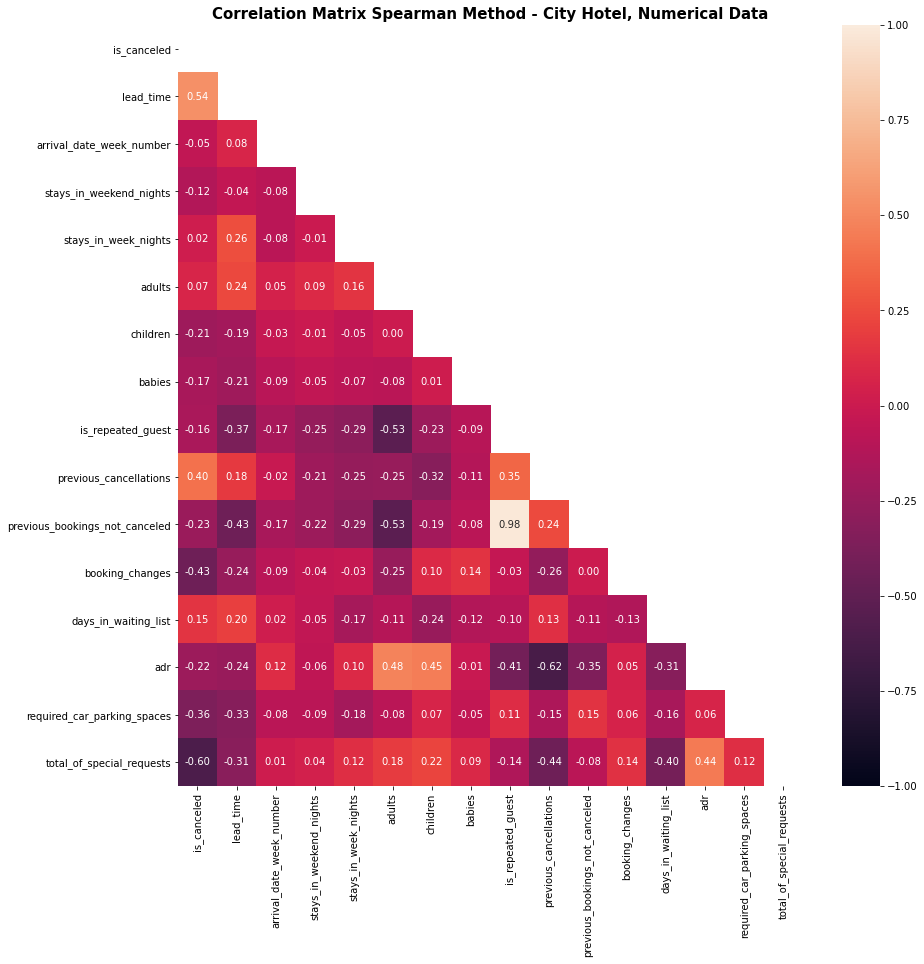

In [60]:
# Correlation matrix city hotel data 

plt.figure(figsize=(14,14))


df_corr = city_df.corr(method='spearman')
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_corr)

heatmap = sns.heatmap(df_corr.corr(), fmt=".2f", vmin=-1, vmax=1, annot=True, mask = matrix)
plt.title("Correlation Matrix Spearman Method - City Hotel, Numerical Data",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Spearman Method - Resort Hotel, Numerical Data ')

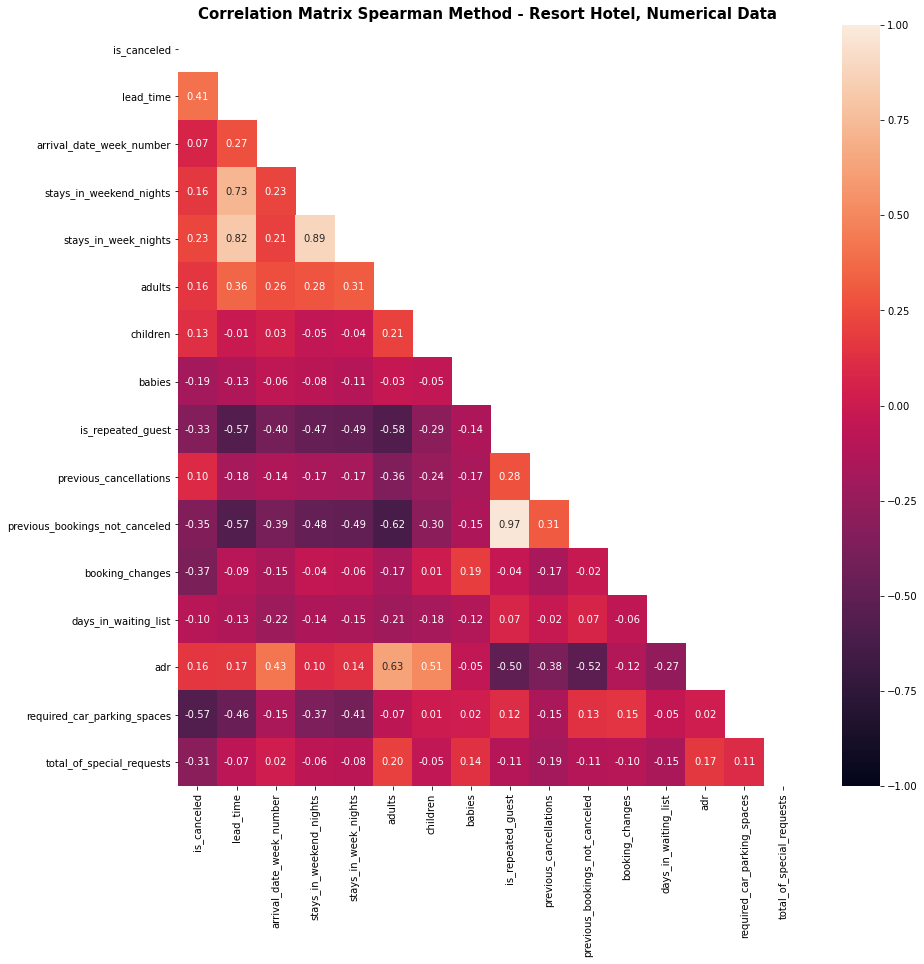

In [61]:
# Correlation matrix resort hotel data 

plt.figure(figsize=(14,14))

df_corr = resort_df.corr(method='spearman')
# Getting the Upper Triangle of the co-relation matrix
matrix2 = np.triu(df_corr)

heatmap = sns.heatmap(df_corr.corr(), fmt=".2f", vmin=-1, vmax=1, annot=True, mask = matrix2)
plt.title("Correlation Matrix Spearman Method - Resort Hotel, Numerical Data ",size=15, weight='bold')

In [62]:
num_col_names = list(num_city_df.columns.values)
num_col_names

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'season_arrival_date_Autumn',
 'season_arrival_date_Spring',
 'season_arrival_date_Summer',
 'season_arrival_date_Winter',
 'hotel_City Hotel',
 'meal_BB',
 'meal_HB',
 'meal_SC',
 'country_AGO',
 'country_ARG',
 'country_AUS',
 'country_AUT',
 'country_BEL',
 'country_BGR',
 'country_BRA',
 'country_CHE',
 'country_CHN',
 'country_CN',
 'country_COL',
 'country_CZE',
 'country_DEU',
 'country_DNK',
 'country_DZA',
 'country_ESP',
 'country_FIN',
 'country_FRA',
 'country_GBR',
 'country_GRC',
 'country_HRV',
 'country_HUN',
 'country_IND',
 'country_IRL',
 'country_ISL',
 'country_ISR',
 'country_ITA',
 'country_JPN',
 'country_KOR',
 'country_

In [63]:
# We already have the numerical data so create a new dataframe with certain categorial data 
# Only looking at season arrival date, market segment and distribution chancel because these seem inutitive 

corr_city_df = num_city_df. iloc[:, [1,17,18,19,20,70,71,72,73,74,75,76,77,78,79,80]]

Text(0.5, 1.0, 'Correlation Matrix Spearman Method - City Hotel, Categorical Data ')

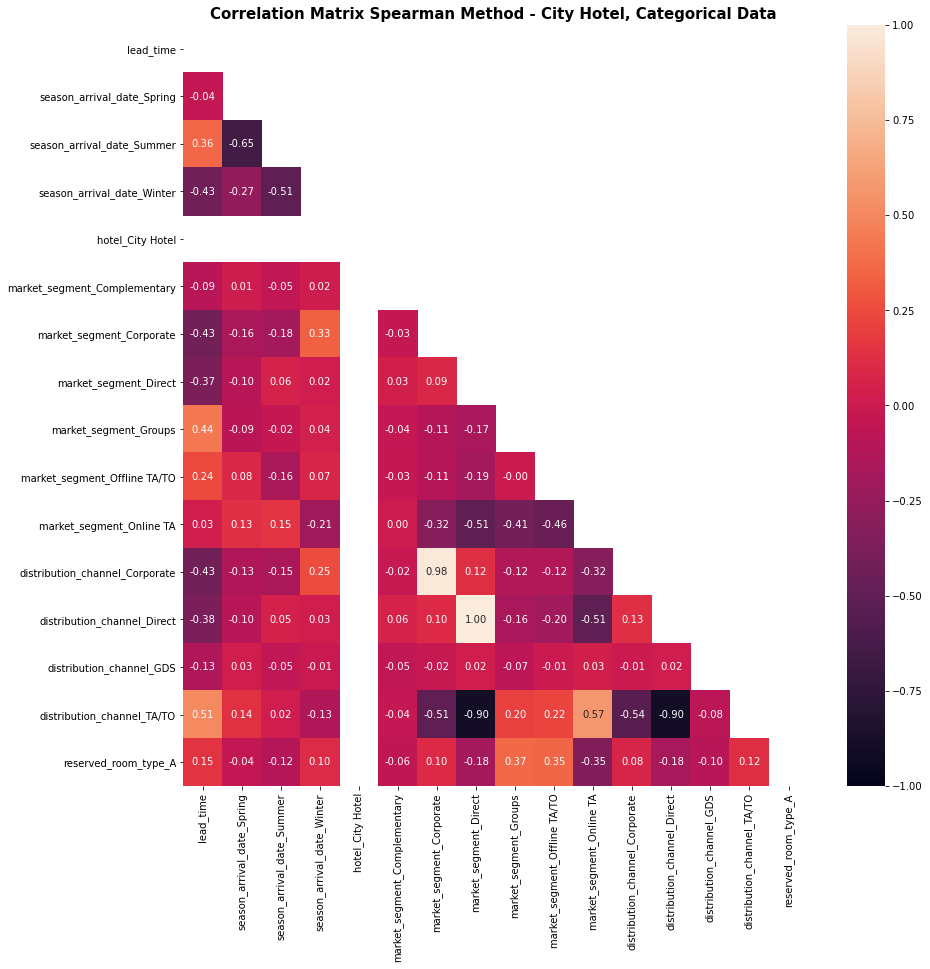

In [64]:
# Correlation matrix city hotel data categorical features 
plt.figure(figsize=(14,14))

df_corr = corr_city_df.corr(method='spearman')
# Getting the Upper Triangle of the co-relation matrix
matrix3 = np.triu(df_corr)

heatmap = sns.heatmap(df_corr.corr(), fmt=".2f", vmin=-1, vmax=1, annot=True, mask = matrix3)
plt.title("Correlation Matrix Spearman Method - City Hotel, Categorical Data ",size=15, weight='bold')

In [65]:
# We already have the numerical data so create a new dataframe with certain categorial data 
# Only looking at season arrival date, market segment and distribution chancel because these seem inutitive 

corr_resort_df = num_resort_df. iloc[:, [1,17,18,19,20,70,71,72,73,74,75,76,77,78,79,80]]

Text(0.5, 1.0, 'Correlation Matrix Spearman Method - Resort Hotel, Categorical Data ')

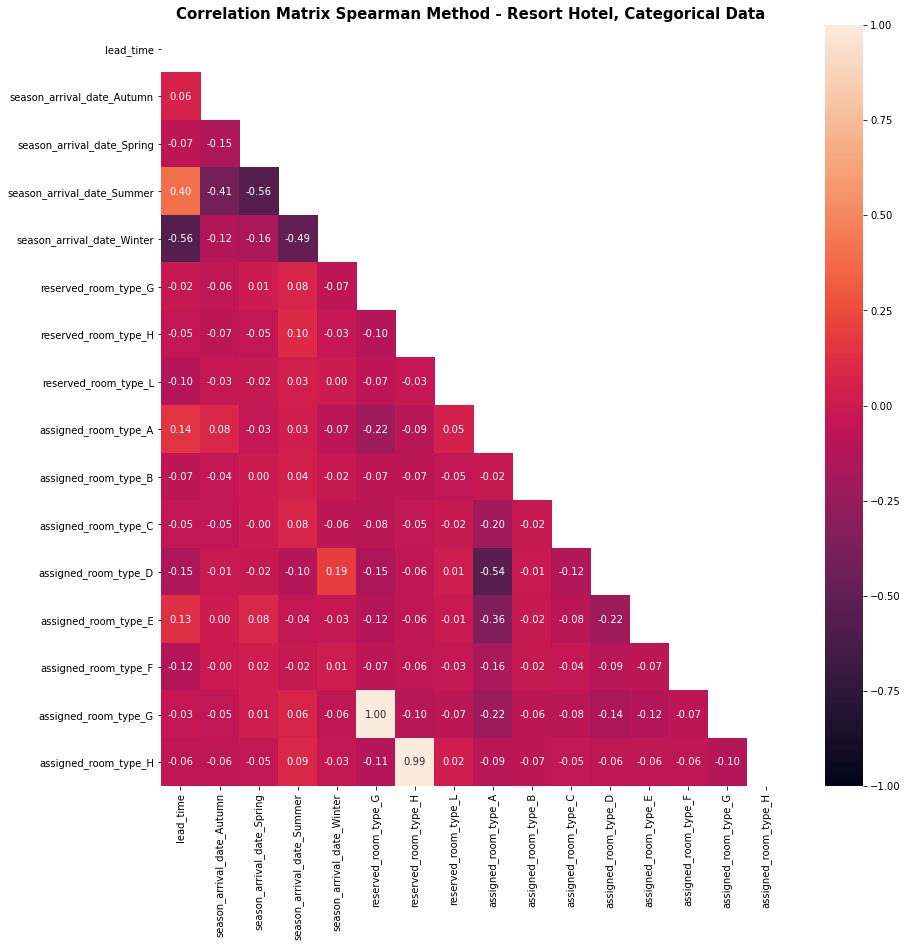

In [66]:
# Correlation matrix resort hotel data categorical features 

plt.figure(figsize=(14,14))

df_corr_2 = corr_resort_df.corr(method='spearman')
# Getting the Upper Triangle of the co-relation matrix
matrix4 = np.triu(df_corr)

heatmap = sns.heatmap(df_corr_2.corr(), fmt=".2f", vmin=-1, vmax=1, annot=True, mask = matrix4)
plt.title("Correlation Matrix Spearman Method - Resort Hotel, Categorical Data ",size=15, weight='bold')

### Further data exploration 

Use a stepwise linear regression model on each hotel's ADR to determine their current pricing strategy and to use the finding to assist in the analysis of later models

In [67]:
# Import the core modules used in our algorithm
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime 
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import norm
from scipy import stats

loopCounter = 0

In [68]:
# Call on cleaned dataset 
resort = pd.read_csv("resort_hotel_data_cleaned.csv")
city = pd.read_csv("city_hotel_data_cleaned.csv")

In [69]:
# As our dataset involves from the code output above, we can see that multiple columns of the data are classified as object.
# To ensure our dataset only involves numerical data, we can use the df.drop function to manually remove each of categorical data columns, by referencing their respective column names.
resort1 = resort.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)
city1 = city.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)

##### Resort hotel 

In [70]:
x = resort1[["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",  "is_repeated_guest", "previous_cancellations", 	"previous_bookings_not_canceled", 	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"]]
# x_columns = resort_regression["lead_time", "arrival_date_week_number"]
#  "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",  "is_repeated_guest", "previous_cancellations", 	"previous_bookings_not_canceled", 	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"	,"is_canceled"]
y = resort1["adr"]
def get_stats():
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    adr   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2264.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:42:29   Log-Likelihood:                         -36819.
No. Observations:                6737   AIC:                                  7.367e+04
Df Residuals:                    6723   BIC:                                  7.376e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [71]:
# Final regression pricing model for resort data
# Given the above t test statistics (specificalyl P>|t|) we eliminate attributes that do not offer a statistical significance on ADR
# Those attributes that are not statisitically significant (i.e. P>0.05), babies, repeated guests, and previous bookings not canceled
x = resort1[["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",  "previous_cancellations", 	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"]]

def get_stats():
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    adr   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2880.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:42:29   Log-Likelihood:                         -36821.
No. Observations:                6737   AIC:                                  7.366e+04
Df Residuals:                    6726   BIC:                                  7.374e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

##### City hotel 

In [72]:
x = city1[["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",  "is_repeated_guest", "previous_cancellations", 	"previous_bookings_not_canceled", 	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"]]
# x_columns = resort_regression["lead_time", "arrival_date_week_number"]
#  "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",  "is_repeated_guest", "previous_cancellations", 	"previous_bookings_not_canceled", 	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"	,"is_canceled"]
y = city1["adr"]
def get_stats():
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    adr   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              3694.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:42:29   Log-Likelihood:                         -71214.
No. Observations:               12987   AIC:                                  1.425e+05
Df Residuals:                   12973   BIC:                                  1.426e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [73]:
# Final regression pricing model for city data
# Given the above t test statistics (specificalyl P>|t|) we eliminate attributes that do not offer a statistical significance on ADR
# Those attributes that are not statisitically significant (i.e. P>0.05), babies anmdrepeated guests 
x = city1[["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",  "previous_cancellations", "previous_bookings_not_canceled",	"booking_changes",	"days_in_waiting_list", 	"required_car_parking_spaces",	"total_of_special_requests"]]

def get_stats():
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    adr   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              4310.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:42:29   Log-Likelihood:                         -71215.
No. Observations:               12987   AIC:                                  1.425e+05
Df Residuals:                   12975   BIC:                                  1.425e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

-

## Models

### DECISION TREE PREDICTION MODEL AND OVERBOOKING FUNCTION

In [74]:
# Install this for the z score 
!pip install scipy


In [75]:
# Import the core modules used in our algorithm
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime 
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import norm
from scipy import stats

loopCounter = 0


In [76]:
# Import the core modules used in our algorithm
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime 
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import norm
from scipy import stats

loopCounter = 0

# Call on cleaned dataset 
resort = pd.read_csv("resort_hotel_data_cleaned.csv")
city = pd.read_csv("city_hotel_data_cleaned.csv")

# As our dataset involves from the code output above, we can see that multiple columns of the data are classified as object.
# To ensure our dataset only involves numerical data, we can use the df.drop function to manually remove each of categorical data columns, by referencing their respective column names.
resort1 = resort.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)
city1 = city.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)


In [77]:
# As our dataset involves from the code output above, we can see that multiple columns of the data are classified as object.
# To ensure our dataset only involves numerical data, we can use the df.drop function to manually remove each of categorical data columns, by referencing their respective column names.
resort1 = resort.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)
city1 = city.drop([ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis = 1)


In [78]:
# Here we create the node class for our algorithm, within which we will define variables
class Node():
    #Define our constructor
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node we define the following attributes:
        #defines the feature (or variable) that the node will be split on (in terms of column number)
        self.feature_index = feature_index
        #defines our decision threshold value (corresponds to the feature index)
        self.threshold = threshold
        #define the left child of a decision node
        self.left = left
        #define the right child of a decision node
        self.right = right
        #define (will store the information gained by each split, denoted by respective decision node)
        self.info_gain = info_gain
        
        # for leaf node we define the following attributes
        #defines the value within the tree node
        # this will be helpful in determining an overall class for each respective tree node
        self.value = value

In [79]:
# Here we create the decision tree classifier class for our algorithm
class DecisionTreeClassifier():
    #define our constructor
    #The attributes within the constructor will be used to define functions within the wider class below
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        # define the root node (First decision node of the tree)
        self.root = None
        
        # stopping conditions
        # we need to define a minimum number of samples for a node to be split
        self.min_samples_split = min_samples_split
        # we need to define the maximum depth of samples or the maximum number of splits for any route on the tree.
        self.max_depth = max_depth
        
        
    #defining the entropy function
    def entropy(self, y):
        global loopCounter
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            loopCounter += 1
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    #defining the gini index function
    def gini_index(self, y):
        global loopCounter
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            loopCounter+=1
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
     #define the information gain function
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        #we need to determine the weighting of the right and left child relative to the parent (ex: L = 14/20, R = 6/20)
        #this is done in python by using the len function to compute the number of attributes in the respective l_child and R_child data segments. 
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        #Gini index takes 1 - the sum of squares of the left and right data
        #Entropy take 1 - the sum of squares on the left and right data, multiplied by the logarithm of the left and right data
        #Due to the presence of a logarithm in the Entropy function, Entropy requires signifcantly more computing power 
        #Therefore, to increase the speed of our algorithm, We first try to find the information gain via the gini index function, then the entropy function
        if mode=="gini":
            #using the gini index function
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            #using the entropy function
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    
    
    #define the split function
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        #the split function utilizes the stated threshold, sorting by row to determine whether or not the threshold has been met or not. 
        #rows where the feature index is less than or equal to the threshold are placed in dataset_left (travel to the leftward node)
        #rows where the feature index is more than threshold are placed in dataset_right (travel to the rightward node)
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
   
    #Define the get best split function
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # creates a dictionary (an unordered and mutable Python container that stores mappings of unique keys to values) to store the best split
        best_split = {}
        # set the initial value of the maximum info gain equal to negative infinity. Setting our initial value to the lowest possible number will ensure info gain is maximized in our model. 
        max_info_gain = -float("inf")
        global loopCounter
        
        # loop over all the features
        # we set the foreloop for every feature index (datapoint) (feature = row, index = column) within the dataset
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            #np.unique returns all the unique values within feature values. 
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            # By setting this equal to possible thresholds, we can test the fit of each possible threshold, determining the ideal threshold to split the node. This is demonstrated below. 
            for threshold in possible_thresholds:
                loopCounter +=1
                # get current split
                # we split using the split function, as defined below
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check to ensure the childs are not null (if they are null they have no data and splitting is obselete)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    # find the target values (previously denoted as Y)
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain according to the information gain function below
                    # the information gain function relies on minimizing the gini index/entropy of each potential threshold. 
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # if the current info gain (this iteration of the loop) is greater than the previous maximum, the current info gain is denoted as the new maximum. 
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # we return the best split in accordance with the threshold that maximises information gain
        return best_split
    
    
    #Defining the calculate_leaf function
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        #the value of the leaf is equal to the majority class present within the leaf
        #Thus, the most majority or most occuring class is listed as Y
        #We can find the majority class by using the max function
        Y = list(Y)
        return max(Y, key=Y.count)   

    #here we define the build_tree function, a recursive function to build the binary tree
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        global loopCounter
        
        #Split the features and targets into two disctinct variables, X and Y. 
        #features are the explanatory variables in our dataset (independent variable)
        #targets are the variables that are being predicted via the model (dependent variable)
        X, Y = dataset[:,:-1], dataset[:,-1]
        #Here we simply count the number of samples and features present in our dataset (X). To do so we use the shape function from Numpy
        num_samples, num_features = np.shape(X)
        loopCounter +=1
        
        # split until stopping conditions are met
        #We need to check the number of samples to ensure there are more than the minimum requirement 
        #We need to check the depth (number of nodes on any given route) to ensure we do not conduct more splits than the stated requirement. 
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split according to the get_best_split function defined below
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            # this is an essential step because if information gain = 0, the node will consist of a single class and would therefore be pure (data is already optimally segmented and should not be split further)
            if best_split["info_gain"]>0:
                #the following code lines demonstrate recursion within our function (this is because we are calling the build tree function within the build tree function)
                #it is essential that we add a value of 1 to curr_depth to track the depth of the tree (this links to stopping conditions previously listed)
                # first we create each of the left subtrees
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # after the left subtrees have been created, we begin creating the right subtrees. 
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # computes the leaf node according to the calculate_lead_value function below
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node (specifcally the leaf node value)
        return Node(value=leaf_value)
    
    #defining the fit function
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        #to merge the x and y strings into a single dataset
        dataset = np.concatenate((X, Y), axis=1)
        
        #runs the merged dataset through the build tree function listed above, to find the root (first node) of the tree
        self.root = self.build_tree(dataset)
    
     #defining the make predicition function
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        #takes a node as the single parameter
        #if the value of the node is none (therefore a leaf node), return the value of the leaf
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        #if the value of the node is less than or equal to the threshold 
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
    #defining the predict function
    def predict(self, X):
        ''' function to predict new dataset '''
        
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
   

    #Defining the print tree function
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        
        if not tree:
            tree = self.root

        #Ensures we only printing the tree if there is an apparent value (no point printing a tree if values are null)
        if tree.value is not None:
            print(tree.value)

        #Prints the tree output as demonstrated in section: 7 below
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    

##### Resort hotel 

In [80]:
# Create Training and Testing of resort data
X = resort1.iloc[:, :-1].values
Y = resort1.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)
print(Y_train)


[[2]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [81]:
# Printing Resort Decision Tree
resort_classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
resort_classifier.fit(X_train,Y_train)
resort_classifier.print_tree()


X_6 <= 1 ? 0.016096532815943254
 left:X_14 <= 142.0 ? 0.01293328533743704
  left:X_4 <= 1 ? 0.011895481177009115
    left:X_2 <= 21 ? 0.006823020952159531
        left:0
        right:0
    right:X_2 <= 102 ? 0.015813041104224712
        left:0
        right:0
  right:X_0 <= 2015-08-16 ? 0.08292566519508415
    left:0
    right:X_2 <= 130 ? 0.049901773251305404
        left:1
        right:2
 right:X_1 <= 0 ? 0.00813803663385504
  left:X_14 <= 124.7 ? 0.00999179205244316
    left:X_2 <= 0 ? 0.007907482288233347
        left:0
        right:0
    right:X_2 <= 0 ? 0.008275024135685816
        left:0
        right:1
  right:X_0 <= 2017-04-09 ? 0.007336450075148715
    left:X_3 <= 43 ? 0.01401670915301978
        left:0
        right:2
    right:X_14 <= 278.14 ? 0.011590669738022474
        left:0
        right:0


In [82]:
#Testing for the accuracy of Resort Model 
Y_pred = resort_classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)


0.49851632047477745

##### City hotel

In [83]:
# Create Training and testing of City Data
X = city1.iloc[:, :-1].values
Y = city1.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train_city, X_test_city, Y_train_city, Y_test_city = train_test_split(X, Y, test_size=.2, random_state=41)
print(Y_train_city)


[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [2]]


In [84]:
# Print City decision tree
city_classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
city_classifier.fit(X_train_city,Y_train_city)
city_classifier.print_tree()


X_1 <= 0 ? 0.028152556485374958
 left:X_14 <= 86.36 ? 0.019425685699960504
  left:X_0 <= 2016-02-29 ? 0.021957510144899606
    left:X_5 <= 1 ? 0.010989787746872037
        left:0
        right:0
    right:X_2 <= 221 ? 0.012294502272772845
        left:0
        right:1
  right:X_2 <= 0 ? 0.014174744852402332
    left:X_5 <= 2 ? 0.015758991201480388
        left:0
        right:0
    right:X_14 <= 124.5 ? 0.00698002011091281
        left:0
        right:1
 right:X_14 <= 70.0 ? 0.015847397818498254
  left:X_6 <= 0 ? 0.004689359383149357
    left:2
    right:X_11 <= 10 ? 0.0031675262460037906
        left:0
        right:1
  right:X_14 <= 140.4 ? 0.00984319662972677
    left:X_5 <= 2 ? 0.0077639477522225
        left:0
        right:0
    right:X_2 <= 224 ? 0.0166888799881294
        left:0
        right:1


In [85]:
#Testing for the accuracy of my city model
Y_pred_city = city_classifier.predict(X_test_city) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_city, Y_pred_city)


0.5688991531947653

### ADVISING ON OVERBOOKING ALLOWANCES 

Once the hotel has a model that can predict whether a guest will cancel their booking, the hotel can use the function defined below to determine how many rooms to overbook for that week

#### Dataframe preparation functions

In [86]:
# Function creates a dataframe with Arrival week and Cancelation predictions as the two columns 

def comb_function_pred(data, pred):
   
    # Convert array to dataframe and access arrival week number column
    df_test = pd.DataFrame(data)
    arrival_week = df_test.iloc[:,3]
    df_arrival_week = pd.DataFrame(arrival_week)

    # Get the cancellation predictions as a dataframe 
    df_test_pred = pd.DataFrame(pred)

    # Combine the dataframes and rename the columns 
    df_comb = pd.concat([df_arrival_week, df_test_pred], axis=1)
    df_comb.rename(columns={df_comb.columns[0]: 'arrival_week'},inplace=True)
    df_comb.rename(columns={df_comb.columns[1]: 'cancellation_pred'},inplace=True)
    
    return df_comb


In [87]:
# Function creates a dataframe with Arrival week and ADR as the two columns 

def comb_function_adr(data):
   
    # Convert array to dataframe and access adr number column
    df_test = pd.DataFrame(data)
    arrival_week = df_test.iloc[:,3]
    df_arrival_week = pd.DataFrame(arrival_week)
    
    # Access ADR number column
    adr = df_test.iloc[:,14]
    df_adr = pd.DataFrame(adr)

    # Combine the dataframes and rename the columns 
    df_comb = pd.concat([df_arrival_week, df_adr], axis=1)
    df_comb.rename(columns={df_comb.columns[0]: 'arrival_week'},inplace=True)
    df_comb.rename(columns={df_comb.columns[1]: 'average_adr'},inplace=True)
    
    # Change adr from an object to a float
    df_comb['average_adr'] = df_comb['average_adr'].astype(float)
    
    return df_comb


In [198]:
def comb_function_nights(data):

    # Convert array to dataframe and access adr number column
    df_test = pd.DataFrame(data)
    arrival_week = df_test.iloc[:,3]
    df_arrival_week = pd.DataFrame(arrival_week)
    
    
    # The data set has weekday length of stay and weekend length of stay
    # Sum these together to create a new column as total length of stay
    df_test['total_nights'] = df_test[4] + df_test[5]
    
    # Access total nights number column
    nights = df_test.iloc[:,16]
    df_nights = pd.DataFrame(nights)

    # Combine the dataframes and rename the columns 
    df_comb = pd.concat([df_arrival_week, df_nights], axis=1)
    df_comb.rename(columns={df_comb.columns[0]: 'arrival_week'},inplace=True)
    df_comb.rename(columns={df_comb.columns[1]: 'total_length_of_stay'},inplace=True)
    
    # Change adr from an object to a float
    df_comb['total_length_of_stay'] = df_comb['total_length_of_stay'].astype(float)
    
    
    return df_comb

In [199]:
# Function creates the final dataframe needed for further analysis 
# Takes the sum of the predicted room cancellations per week 
# Takes the average of the ADR per week
# Combines the two dataframes 

def final_comb_df(data, pred):
    
    df = comb_function_pred(data, pred)
    df_adr = comb_function_adr(data)
    df_nights = comb_function_nights(data)
    
    # Use GroupBy() to compute the sum
    df2 = df.groupby('arrival_week').sum()
    df3 = df_adr.groupby('arrival_week').mean()
    df4 = df_nights.groupby('arrival_week').mean()
    
    # Combine the dataframes and rename the columns 
    final_df = pd.concat([df2, df3, df4], axis=1)
    
    return final_df

#### Function that tells the hotel how many rooms to book
#### Accounting for changes in cancellation rates across different weeks 

In [89]:
def seasonal_overbook_n_rooms_function(df, week_number):
    
    # Rather than finding the mean of predicted canellations across the entire year 
    # Find the mean of predicted cancellations across the month the week number is in
    # This will take into account that some months are predicted more cancellations than others 

    if week_number < 6: 
        df_0 = df.iloc[0:5, :]
        
    elif week_number < 12:
        df_0 = df.iloc[5:10, :]
        
    elif week_number < 17:
        df_0 = df.iloc[10:15, :]
        
    elif week_number < 22:
        df_0 = df.iloc[15:20, :]
        
    elif week_number < 27:
        df_0 = df.iloc[20:25, :]
    
    elif week_number < 32:
        df_0 = df.iloc[25:30, :]
    
    elif week_number < 37:
        df_0 = df.iloc[30:35, :]
        
    elif week_number < 43:
        df_0 = df.iloc[35:40, :]
        
    elif week_number < 48:
        df_0 = df.iloc[40:45, :]
            
    else:
        df_0 = df.iloc[45:50, :]
    
    
    # Find the mean and standrad deviation to deterine the normal distribution of cancellations 
    mean = df_0["cancellation_pred"].mean()
    sd = df_0["cancellation_pred"].std()
    
    print('X ~ N', '(', mean, ',', sd,'^2', ')')
    
     # We now know that X ~ N(mean, (sd)^2)
    # To find the optimal number of rooms to overbook we also need the following information 
    # - Underage cost = opportunity cost not booking out a room 
    # - Overage cost = cost of bumping a customer/ not having an avaliable room 
    
    # Account for that index starts at 0 and there are 3 weeks missing 
    if week_number < 7:
        x = week_number - 1 
    
    elif week_number < 42:
        x = week_number - 2
    
    elif week_number < 51:
        x = week_number - 3
        
    else:
        x = week_number - 4
    
    # Underage cost 
    # value at row position 0, column position 1
    u_cost = df.iat[x, 1]
    
    print('Opportunity cost (per night) of having an empty room:  €', u_cost)
    
    
    # ESTIMATION 
    # Overage cost --> estimate that the cost of overbooking it 62% more than the underage cost 
    # Remember the overage cost = cost of bumping a customer - opporunity cost of having an empty room 
    o_cost = u_cost * 1.62
    
    print('Cost (per night) of overbooking rooms:  €', o_cost)
    
    
    # Calculate the critical factile 
    crit_fac = u_cost / (u_cost + o_cost)
    
    # Find the corresponding z value from standrad normal table for the critical factile value 
    z = norm.ppf(crit_fac)
    
    # Find the optimal number of rooms to overbook 
    Q = mean + (z * sd)
    
    # Round Q to the nearest whole number 
    Q = round(Q)
    
    return print('Optimal number of rooms to overbook:', Q)

In [222]:
def revenue_gained_function(df, week_number):
    
    # Find the average ADR and number of nights stayed for that week 
    
    if week_number < 7:
        x = week_number - 1 
    
    elif week_number < 42:
        x = week_number - 2
    
    elif week_number < 51:
        x = week_number - 3
        
    else:
        x = week_number - 4
    
    # Underage cost 
    # value at row position 0, column position 1
    adr = df.iat[x, 1]
    nights = df.iat[x, 2]
    
    
    # Multiply the ADR for the week by the optimal number of rooms to overbook by 
    # Assuming the hotel didn't previously have an overbooking allowance policy 
    # The additional revenue gained from overbooking is 
    
    ad_rev = Q_function(df, week_number) * adr * nights
    ad_rev = round(ad_rev)
    
    return print('By overbooking by the optimal quantity, the hotel recieves €', ad_rev, 'in additional revenue for week', week_number)


In [203]:
# This needs to be kept in 
# It only return the Q value rather than all the print steps included in the orginal overbook room function

def Q_function(df, week_number):

    if week_number < 6: 
        df_0 = df.iloc[0:5, :]
  
    elif week_number < 12:
        df_0 = df.iloc[5:10, :]
        
    elif week_number < 17:
        df_0 = df.iloc[10:15, :]
        
    elif week_number < 22:
        df_0 = df.iloc[15:20, :]
        
    elif week_number < 27:
        df_0 = df.iloc[20:25, :]
    
    elif week_number < 32:
        df_0 = df.iloc[25:30, :]
    
    elif week_number < 37:
        df_0 = df.iloc[30:35, :]
        
    elif week_number < 43:
        df_0 = df.iloc[35:40, :]
        
    elif week_number < 48:
        df_0 = df.iloc[40:45, :]
            
    else:
        df_0 = df.iloc[45:50, :]
    
    # Find the mean and standrad deviation to deterine the normal distribution of cancellations 
    mean = df_0["cancellation_pred"].mean()
    sd = df_0["cancellation_pred"].std()
     
    # Account for that index starts at 0 and there are 3 weeks missing 
    if week_number < 7:
        x = week_number - 1 
    
    elif week_number < 42:
        x = week_number - 2
    
    elif week_number < 51:
        x = week_number - 3
        
    else:
        x = week_number - 4
    
    # Underage cost 
    # value at row position 0, column position 1
    u_cost = df.iat[x, 1]
    
    
    # ESTIMATION 
    o_cost = u_cost * 1.62
        
    # Calculate the critical factile 
    crit_fac = u_cost / (u_cost + o_cost)
    
    # Find the corresponding z value from standrad normal table for the critical factile value 
    z = norm.ppf(crit_fac)
    
    # Find the optimal number of rooms to overbook 
    Q = mean + (z * sd)
    
    # Round Q to the nearest whole number 
    Q = round(Q)
    
    return Q

##### Resort hotel 

In [200]:
# View the final dataframe that will be used 

final_resort_df = final_comb_df(X_test, Y_pred)
final_resort_df.head()


,cancellation_pred,average_adr,total_length_of_stay
arrival_week,,,
1,0,62.535128,2.487179
2,0,42.924118,2.176471
3,0,51.363265,2.918367
4,0,38.266667,1.833333
5,0,49.539000,3.550000


In [204]:
# Input week number 
# Get the optimal number of rooms to overbook for that week 

seasonal_overbook_n_rooms_function(final_resort_df, 27)


X ~ N ( 25.0 , 14.882876066137216 ^2 )
Opportunity cost (per night) of having an empty room:  € 136.0870731707317
Cost (per night) of overbooking rooms:  € 220.4610585365854
Optimal number of rooms to overbook: 21


In [205]:
# Get the revenue gained by overbooking the optimal number of rooms 

revenue_gained_function(final_resort_df, 27)


By overbooking by the optimal quantity, the hotel recieves € 14080 in additional revenue for week 27


In [217]:
#print for all the weeks
for i in range(1,53):
    seasonal_overbook_n_rooms_function(final_resort_df, i)
    

X ~ N ( 0.0 , 0.0 ^2 )
Opportunity cost (per night) of having an empty room:  € 62.5351282051282
Cost (per night) of overbooking rooms:  € 101.30690769230769
Optimal number of rooms to overbook: 0
X ~ N ( 0.0 , 0.0 ^2 )
Opportunity cost (per night) of having an empty room:  € 42.92411764705883
Cost (per night) of overbooking rooms:  € 69.53707058823531
Optimal number of rooms to overbook: 0
X ~ N ( 0.0 , 0.0 ^2 )
Opportunity cost (per night) of having an empty room:  € 51.36326530612245
Cost (per night) of overbooking rooms:  € 83.20848979591837
Optimal number of rooms to overbook: 0
X ~ N ( 0.0 , 0.0 ^2 )
Opportunity cost (per night) of having an empty room:  € 38.266666666666666
Cost (per night) of overbooking rooms:  € 61.992000000000004
Optimal number of rooms to overbook: 0
X ~ N ( 0.0 , 0.0 ^2 )
Opportunity cost (per night) of having an empty room:  € 49.539
Cost (per night) of overbooking rooms:  € 80.25318000000001
Optimal number of rooms to overbook: 0
X ~ N ( 0.0 , 0.0 ^2 )
O

In [214]:
# The number of rooms to overbook for each week

for i in range(1,53):
    print(Q_function(final_resort_df, i))
    

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
6
6
6
6
6
21
21
21
21
21
24
24
24
24
24
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4


In [220]:
# The additional revenue gained for each week

for i in range(1,53):
    print(revenue_gained_function(final_resort_df, i))

0
0
0
0
0
0
0
0
0
0
0
260
272
431
499
338
267
385
387
412
398
2179
4438
4487
3695
3668
14080
16248
21717
17063
20895
26252
26934
23174
16476
16176
1450
771
892
869
1285
1285
476
476
514
455
312
155
333
501
501
1169


##### City hotel 

In [201]:
# View the final dataframe that will be used 

final_city_df = final_comb_df(X_test_city, Y_pred_city)
final_city_df.head()


,cancellation_pred,average_adr,total_length_of_stay
arrival_week,,,
1,1,86.346774,3.129032
2,4,81.265682,2.840909
3,2,81.738831,2.987013
4,0,78.083333,1.666667
5,0,83.300000,3.909091


In [206]:
# Input week number 
# Get the optimal number of rooms to overbook for that week 

seasonal_overbook_n_rooms_function(final_city_df, 27)


X ~ N ( 25.2 , 14.219704638282751 ^2 )
Opportunity cost (per night) of having an empty room:  € 110.80326315789475
Cost (per night) of overbooking rooms:  € 179.5012863157895
Optimal number of rooms to overbook: 21


In [207]:
# Get the revenue gained by overbooking the optimal number of rooms 

revenue_gained_function(final_city_df, 27)


By overbooking by the optimal quantity, the hotel recieves € 6221 in additional revenue for week 27


In [218]:
#print for all the weeks
for i in range(1,53):
    seasonal_overbook_n_rooms_function(final_city_df, i)
    

X ~ N ( 1.4 , 1.6733200530681511 ^2 )
Opportunity cost (per night) of having an empty room:  € 86.34677419354836
Cost (per night) of overbooking rooms:  € 139.88177419354835
Optimal number of rooms to overbook: 1
X ~ N ( 1.4 , 1.6733200530681511 ^2 )
Opportunity cost (per night) of having an empty room:  € 81.26568181818182
Cost (per night) of overbooking rooms:  € 131.65040454545456
Optimal number of rooms to overbook: 1
X ~ N ( 1.4 , 1.6733200530681511 ^2 )
Opportunity cost (per night) of having an empty room:  € 81.73883116883115
Cost (per night) of overbooking rooms:  € 132.41690649350647
Optimal number of rooms to overbook: 1
X ~ N ( 1.4 , 1.6733200530681511 ^2 )
Opportunity cost (per night) of having an empty room:  € 78.08333333333333
Cost (per night) of overbooking rooms:  € 126.495
Optimal number of rooms to overbook: 1
X ~ N ( 1.4 , 1.6733200530681511 ^2 )
Opportunity cost (per night) of having an empty room:  € 83.29999999999998
Cost (per night) of overbooking rooms:  € 134.

In [215]:
# The number of rooms to overbook for each week

for i in range(1,53):
    print(Q_function(final_city_df, i))

1
1
1
1
1
1
1
1
1
1
1
8
8
8
8
8
12
12
12
12
12
9
9
9
9
9
21
21
21
21
21
18
18
18
18
18
9
9
9
9
9
9
2
2
2
2
2
1
1
1
1
1


In [221]:
# The additional revenue gained for each week

for i in range(1,53):
    print(revenue_gained_function(final_city_df, i))
    

270
231
244
130
326
459
459
209
351
306
262
2934
2792
3081
2622
3464
5108
5037
5096
5660
6677
2831
3503
2623
3278
3003
6221
7581
7396
11091
8387
8609
7371
6566
5606
6615
4076
2413
2989
2580
3056
3056
616
526
401
1028
763
261
162
176
176
255


-

### CLUSTERING ALGORITHM ON THE HOTEL DEMAND DATASET 

In [101]:
pip install gower

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install Kmodes

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Load libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import gower

# kmodes can only be run on categorical data 
# k prototypes is used to run a mixture of numerical and categorical data
from kmodes.kprototypes import KPrototypes 
from kmodes.kmodes import KModes

In [104]:
# Import the dataframes 

resort_df = pd.read_csv("resort_hotel_data_cleaned.csv")
city_df = pd.read_csv("city_hotel_data_cleaned.csv")

In [105]:
# Extra data cleaning for clustering algorithm 

# Drop the data 
resort_df = resort_df.drop(['date', 'hotel'], axis = 1)
city_df = city_df.drop(['date', 'hotel'], axis = 1)

# Change babies attibute to an integer from a float 
resort_df['children'] = resort_df['children'].astype(int)
city_df['children'] = city_df['children'].astype(int)

In [106]:
# To make sure we know each attributes data type 

resort_df.info()
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     6737 non-null   int64  
 1   lead_time                       6737 non-null   int64  
 2   arrival_date_week_number        6737 non-null   int64  
 3   stays_in_weekend_nights         6737 non-null   int64  
 4   stays_in_week_nights            6737 non-null   int64  
 5   adults                          6737 non-null   int64  
 6   children                        6737 non-null   int64  
 7   babies                          6737 non-null   int64  
 8   meal                            6737 non-null   object 
 9   country                         6737 non-null   object 
 10  market_segment                  6737 non-null   object 
 11  distribution_channel            6737 non-null   object 
 12  is_repeated_guest               67

In [107]:
# Scale the numeric data in both dataframes 

def scale_numeric_function(df):
    
    # Define numerical and categorical columns
    numerical_columns = df.select_dtypes(['int','float']).columns.tolist()
    categorical_columns = df.select_dtypes('object').columns.tolist()
    
    # Set the scaler 
    scaler = StandardScaler()

    # Create a copy of our data to be scaled
    df_scale = df.copy()

    # standard scale numerical features
    for c in numerical_columns:
        df_scale[c] = scaler.fit_transform(df[[c]])

    # view first few rows of scaled numeric data
    return df_scale.head()

In [108]:
# Run the scale numeric function and scale the resort and city hotel dataframes 

scale_resort_df = scale_numeric_function(resort_df)
scale_city_df = scale_numeric_function(city_df)


### Creating new dataframes by market segment 

In [109]:
# Find the unique values in market segment 
# Find the percentage of each market segment 

def market_segment_prop(df):
    for X in df['market_segment'].unique().tolist():
        print(X, '     ', round(df['market_segment'].value_counts()[X]/len(df)*100,2), '% of the dataset')


In [110]:
market_segment_prop(resort_df)

Offline TA/TO       19.09 % of the dataset
Online TA       51.73 % of the dataset
Direct       16.52 % of the dataset
Corporate       3.79 % of the dataset
Groups       8.85 % of the dataset
Complementary       0.03 % of the dataset


In [111]:
market_segment_prop(city_df)

Online TA       56.49 % of the dataset
Groups       13.54 % of the dataset
Offline TA/TO       16.83 % of the dataset
Direct       9.12 % of the dataset
Corporate       3.73 % of the dataset
Aviation       0.26 % of the dataset
Complementary       0.03 % of the dataset


In [112]:
# Drop rows that have market segment as complementary and aviation for both hotel datasets 

def drop_comp_function(df):

    # Get names of indexes for which column market segment has value complementary
    indexNames = df[df['market_segment'] == 'Complementary'].index
    
    # Get names of indexes for which column market segment has value aviation
    indexNames_2 = df[df['market_segment'] == 'Aviation'].index

    # Delete these row indexes from dataFrame
    df.drop(indexNames, inplace=True)
    df.drop(indexNames_2, inplace=True)
    
    return df['market_segment'].unique().tolist()

In [113]:
# Check that the function worked on resort hotel data 

drop_comp_function(resort_df)

['Offline TA/TO', 'Online TA', 'Direct', 'Corporate', 'Groups']

In [114]:
# Check that the function worked on city hotel data 

drop_comp_function(city_df)

['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Corporate']

In [115]:
# Group by market segment for resort hotel 
df_groupby_market_seg = resort_df.groupby('market_segment')

# Group by Online TA 
online_resort_df = df_groupby_market_seg.get_group('Online TA')
offline_resort_df = df_groupby_market_seg.get_group('Offline TA/TO')
direct_resort_df = df_groupby_market_seg.get_group('Direct')
group_resort_df = df_groupby_market_seg.get_group('Groups')
corporate_resort_df = df_groupby_market_seg.get_group('Corporate')


In [116]:
# Group by market segment for city hotel 
df_groupby_market_seg_city = city_df.groupby('market_segment')

# Group by Online TA 
online_city_df = df_groupby_market_seg_city.get_group('Online TA')
offline_city_df = df_groupby_market_seg_city.get_group('Offline TA/TO')
direct_city_df = df_groupby_market_seg_city.get_group('Direct')
group_city_df = df_groupby_market_seg_city.get_group('Groups')
corporate_city_df = df_groupby_market_seg_city.get_group('Corporate')


### Clustering Algorithm

In [117]:
# Get a list of the indices of the categorical attributes in a dataframe 

def cat_index_function(df):
    cat_feature = []
    for col in df.select_dtypes('object').columns:
        cat_col_index = df.columns.get_loc(col)
        cat_feature.append(cat_col_index)
    return(cat_feature)

In [118]:
# Create a function that returns a cluster list 

def cluster_list_function(clusters):
    cluster_list = []
    for c in clusters:
        cluster_list.append(c)
    
    return cluster_list 

In [119]:
# Determine what the optimal number of clusters is 

def opt_cluster_function(df):
    
    # Create a distance matrix using the gower function for the silhouette score function
    gower_resort_matrix = gower.gower_matrix(df)
    
    # Set an empty list 
    silhouette_avg = []
    
    # Set the range of number of clusters 
    num_clusters = list(range(2, 15))

    # calculate average silhouette score for each number of cluster (2 to 10)
    for k in num_clusters:
        kproto = KPrototypes(n_clusters=k, init='Huang', max_iter = 5, n_init = 3, random_state=42)
        kproto.fit_predict(df, categorical= cat_index_function(df))
        cluster_labels = kproto.labels_
        silhouette_avg.append(silhouette_score(gower_resort_matrix, cluster_labels))
        
        # Find the maximium value in the list and index this value 
        # Add two to account for that n starts at 2 rather than 0 
        max_value = max(silhouette_avg)
        index_max_value = silhouette_avg.index(max_value)
        opt_cluster = index_max_value + 2 

    return opt_cluster


In [120]:
# Create the main clustering algorithm 

def kproto_function(df):
    
    # Convert pandas dataframe to numpy array 
    data = df.values
    
    # Index the categorical features 
    cat_features = cat_index_function(df)
    
    # Run the K Prototype algorithm
    kproto = KPrototypes(n_clusters = opt_cluster_function(df), verbose = 2, max_iter = 20)

    # Get the clusters 
    clusters = kproto.fit_predict(df, categorical = cat_index_function(df))
    
    # Create a new column in the dataframe with each cluster assignment 
    df['cluster'] = cluster_list_function(clusters)
    
    return df.head()

In [121]:
# Find the number of points in each cluster 

def cluster_count_function(df):
    cluster_count_df = df["cluster"].value_counts()
    
    return cluster_count_df

The silhouette method is producing small cluster numbers 

So, below will be a different function for the kproto algorithm 

In [122]:
# Elbow method to determine optimal number of clusters 

def elbow_method_function(df):

    num_clusters = list(range(2, 11))
    cost_values = []

    # calculate cost values for each number of clusters (2 to 10)
    for k in num_clusters:
        kproto = KPrototypes(n_clusters=k, init='Huang', max_iter = 5, n_init = 3, random_state=42)
        kproto.fit_predict(corporate_resort_df, categorical= cat_index_function(corporate_resort_df))
        cost_values.append(kproto.cost_)

    # plot cost against number of clusters
   
    ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
    ax.set_title('Elbow curve', fontsize=14)
    ax.set_xlabel('No of clusters', fontsize=11)
    ax.set_ylabel('Cost', fontsize=11)
    
    return ax




In [123]:
# Create the main clustering algorithm 
# This time include another input in the function for k number of clusters 
# Number of clusters is determined by the elbow method 

def kproto_function_2(df, k):
    
    # Convert pandas dataframe to numpy array 
    data = df.values
    
    # Index the categorical features 
    cat_features = cat_index_function(df)
    
    # Run the K Prototype algorithm
    kproto = KPrototypes(n_clusters = k, verbose = 2, max_iter = 20)

    # Get the clusters 
    clusters = kproto.fit_predict(df, categorical = cat_index_function(df))
    
    # Create a new column in the dataframe with each cluster assignment 
    df['cluster'] = cluster_list_function(clusters)
    
    return df.head()

#### Running the functions on the datasets 

In [124]:
kproto_function_2(corporate_resort_df, 5)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 53, ncost: 126889.70036204091
Run: 1, iteration: 2/20, moves: 15, ncost: 124025.01048131392
Run: 1, iteration: 3/20, moves: 0, ncost: 124025.01048131392
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 76, ncost: 106597.3524684667
Run: 2, iteration: 2/20, moves: 18, ncost: 102953.50563265465
Run: 2, iteration: 3/20, moves: 4, ncost: 102487.86350142428
Run: 2, iteration: 4/20, moves: 0, ncost: 102487.86350142428
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 42, ncost: 123042.12843889116
Run: 3, iteration: 2/20, moves: 14, ncost: 118151.50012076252
Run: 3, iteration: 3/20, moves: 7, ncost: 115364.1601739665
Run: 3, iteration: 4/20, moves: 0, ncost: 115364.1601739665
Init: init

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cluster
129,0,84,28,1,1,2,0,0,HB,PRT,...,0,No Deposit,0,Transient,100.0,1,0,Check-Out,2015-07-13,2
197,0,0,29,1,3,1,0,0,BB,PRT,...,0,No Deposit,0,Transient,114.0,0,0,Check-Out,2015-07-17,4
221,0,1,29,0,1,1,0,0,BB,PRT,...,0,No Deposit,0,Transient,134.0,0,0,Check-Out,2015-07-15,1
241,0,0,29,0,1,1,0,0,BB,PRT,...,0,No Deposit,0,Transient,134.0,0,0,Check-Out,2015-07-15,1
305,1,4,34,1,0,2,0,0,BB,PRT,...,0,No Deposit,0,Transient,185.0,0,0,Canceled,2015-08-13,1


Text(0.5, 1.0, 'Elbow Curve - Corporate Market Segment, Resort Hotel')

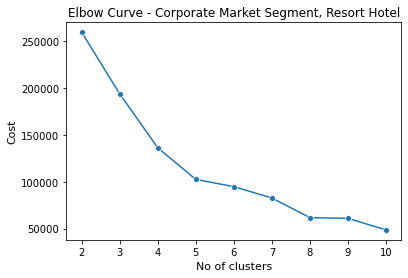

In [125]:
elbow_method_function(corporate_resort_df)
plt.title('Elbow Curve - Corporate Market Segment, Resort Hotel')

In [126]:
cluster_count_function(corporate_resort_df)

0    107
3     56
4     46
1     27
2     19
Name: cluster, dtype: int64

In [127]:
# Create a list containing all the datasets 

resort_datasets = [online_resort_df, offline_resort_df, direct_resort_df, group_resort_df, corporate_resort_df]

city_datasets =[online_city_df, offline_city_df, direct_city_df, group_city_df, corporate_city_df]


In [128]:
# Using silhouette score for optimal cluster value 

Text(0.5, 1.0, 'Elbow Curve - Online Travel Agent Market Segment, Resort Hotel')

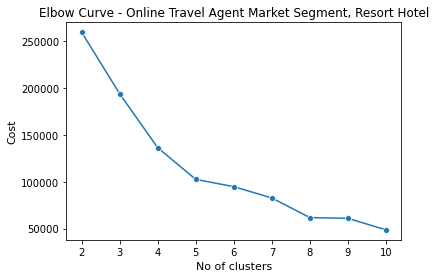

In [129]:
elbow_method_function(online_resort_df)
plt.title('Elbow Curve - Online Travel Agent Market Segment, Resort Hotel')

Text(0.5, 1.0, 'Elbow Curve - Offline Travel Agent Market Segment, Resort Hotel')

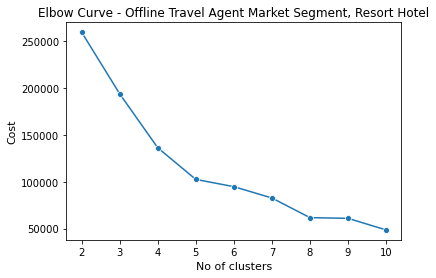

In [130]:
elbow_method_function(offline_resort_df)
plt.title('Elbow Curve - Offline Travel Agent Market Segment, Resort Hotel')

Text(0.5, 1.0, 'Elbow Curve - Direct Market Segment, Resort Hotel')

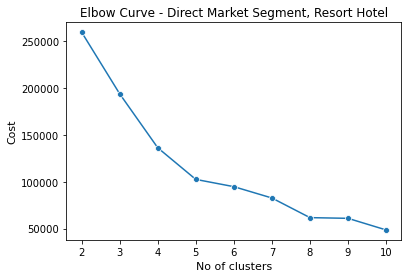

In [131]:
elbow_method_function(direct_resort_df)
plt.title('Elbow Curve - Direct Market Segment, Resort Hotel')

Text(0.5, 1.0, 'Elbow Curve - Group Market Segment, Resort Hotel')

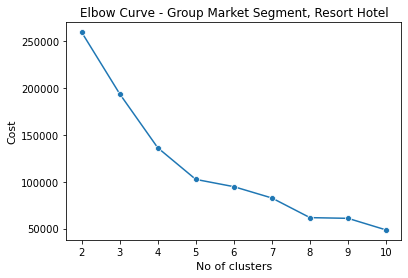

In [132]:
elbow_method_function(group_resort_df)
plt.title('Elbow Curve - Group Market Segment, Resort Hotel')

Text(0.5, 1.0, 'Elbow Curve - Corporate Market Segment, Resort Hotel')

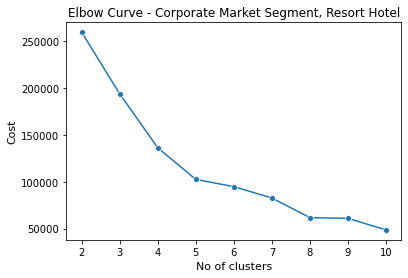

In [133]:
elbow_method_function(corporate_resort_df)
plt.title('Elbow Curve - Corporate Market Segment, Resort Hotel')

Text(0.5, 1.0, 'Elbow Curve - Online Travel Agent Market Segment, City Hotel')

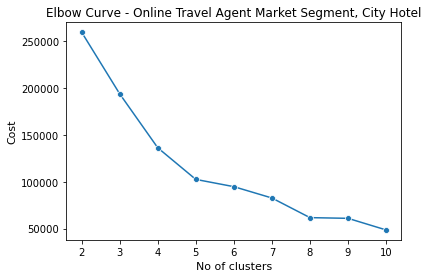

In [134]:
elbow_method_function(online_city_df)
plt.title('Elbow Curve - Online Travel Agent Market Segment, City Hotel')

Text(0.5, 1.0, 'Elbow Curve - Offline Travel Agent Market Segment, City Hotel')

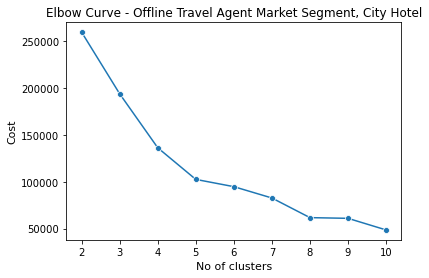

In [135]:
elbow_method_function(offline_city_df)
plt.title('Elbow Curve - Offline Travel Agent Market Segment, City Hotel')

Text(0.5, 1.0, 'Elbow Curve - Direct Market Segment, City Hotel')

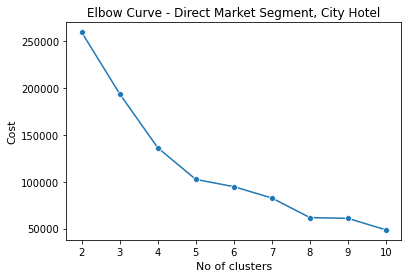

In [136]:
elbow_method_function(direct_city_df)
plt.title('Elbow Curve - Direct Market Segment, City Hotel')

Text(0.5, 1.0, 'Elbow Curve - Group Market Segment, City Hotel')

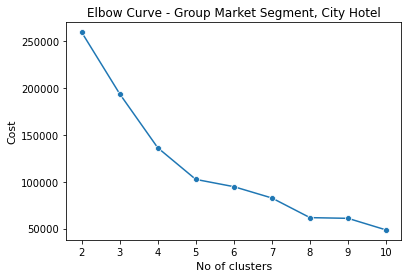

In [137]:
elbow_method_function(group_city_df)
plt.title('Elbow Curve - Group Market Segment, City Hotel')

Text(0.5, 1.0, 'Elbow Curve - Corporate Market Segment, City Hotel')

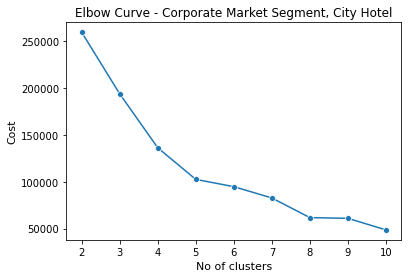

In [138]:
elbow_method_function(corporate_city_df)
plt.title('Elbow Curve - Corporate Market Segment, City Hotel')

In [139]:
for dataset in resort_datasets: 

    kproto_function_2(dataset, 5)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 645, ncost: 9808321.820777059
Run: 1, iteration: 2/20, moves: 319, ncost: 9522433.313353974
Run: 1, iteration: 3/20, moves: 91, ncost: 9487277.57806992
Run: 1, iteration: 4/20, moves: 71, ncost: 9466352.834737342
Run: 1, iteration: 5/20, moves: 55, ncost: 9454105.72699761
Run: 1, iteration: 6/20, moves: 37, ncost: 9448080.550036833
Run: 1, iteration: 7/20, moves: 18, ncost: 9446850.529708292
Run: 1, iteration: 8/20, moves: 16, ncost: 9444962.493468406
Run: 1, iteration: 9/20, moves: 18, ncost: 9442421.07056153
Run: 1, iteration: 10/20, moves: 9, ncost: 9441951.466659699
Run: 1, iteration: 11/20, moves: 1, ncost: 9441941.413689796
Run: 1, iteration: 12/20, moves: 0, ncost: 9441941.413689796
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 8

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 338, ncost: 2654814.8583301613
Run: 1, iteration: 2/20, moves: 105, ncost: 2558850.0649722624
Run: 1, iteration: 3/20, moves: 70, ncost: 2513614.8600544133
Run: 1, iteration: 4/20, moves: 31, ncost: 2505979.89511493
Run: 1, iteration: 5/20, moves: 27, ncost: 2496602.672953811
Run: 1, iteration: 6/20, moves: 19, ncost: 2491718.4826954394
Run: 1, iteration: 7/20, moves: 9, ncost: 2490440.3987821992
Run: 1, iteration: 8/20, moves: 7, ncost: 2489176.8744813376
Run: 1, iteration: 9/20, moves: 11, ncost: 2487839.3768526316
Run: 1, iteration: 10/20, moves: 3, ncost: 2487734.1756081637
Run: 1, iteration: 11/20, moves: 3, ncost: 2487471.3097206154
Run: 1, iteration: 12/20, moves: 5, ncost: 2487169.1268831673
Run: 1, iteration: 13/20, moves: 1, ncost: 2487146.434775766
Run: 1, iteration: 14/20, moves: 0, ncost:

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Starting iterations...
Run: 1, iteration: 1/20, moves: 105, ncost: 2970573.5800593155
Run: 1, iteration: 2/20, moves: 67, ncost: 2898817.343704455
Run: 1, iteration: 3/20, moves: 39, ncost: 2868450.225957647
Run: 1, iteration: 4/20, moves: 14, ncost: 2863892.7832579007
Run: 1, iteration: 5/20, moves: 2, ncost: 2863614.6029900666
Run: 1, iteration: 6/20, moves: 2, ncost: 2863435.5359553024
Run: 1, iteration: 7/20, moves: 3, ncost: 2863298.3536833464
Run: 1, iteration: 8/20, moves: 0, ncost: 2863298.3536833464
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 192, ncost: 2829746.1607402326
Run: 2, iteration: 2/20, moves: 62, ncost: 2758432.0446799616
Run: 2, iteration: 3/20, moves: 62, ncost: 2683833.8211815436
Run: 2, iteration: 4/20, moves: 64, ncost: 2615996.7705089003
Run: 2, iteration: 5/20, moves: 61, ncost: 2576187.857840181
Run: 2, iteration: 6/20, moves: 24, ncost: 2567419.3276022077
Run: 2, iteration: 7/20, moves: 9,

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Run: 1, iteration: 1/20, moves: 156, ncost: 655048.4983257266
Run: 1, iteration: 2/20, moves: 98, ncost: 488794.00558114756
Run: 1, iteration: 3/20, moves: 4, ncost: 487986.070012988
Run: 1, iteration: 4/20, moves: 0, ncost: 487986.070012988
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 31, ncost: 732295.5096242627
Run: 2, iteration: 2/20, moves: 78, ncost: 493806.4337138898
Run: 2, iteration: 3/20, moves: 2, ncost: 493583.93065435416
Run: 2, iteration: 4/20, moves: 0, ncost: 493583.93065435416
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 89, ncost: 746766.4045682005
Run: 3, iteration: 2/20, moves: 34, ncost: 698031.1890722184
Run: 3, iteration: 3/20, moves: 11, ncost: 687057.911710589
Run: 3, iteration: 4/20, moves: 0, ncost: 687057.911710589
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 1

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Run: 1, iteration: 4/20, moves: 0, ncost: 135524.78912219597
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 41, ncost: 108001.42937292888
Run: 2, iteration: 2/20, moves: 10, ncost: 103949.16796414663
Run: 2, iteration: 3/20, moves: 8, ncost: 102521.17888802155
Run: 2, iteration: 4/20, moves: 1, ncost: 102426.950191393
Run: 2, iteration: 5/20, moves: 0, ncost: 102426.950191393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 79, ncost: 148182.12168794704
Run: 3, iteration: 2/20, moves: 32, ncost: 143760.27612134736
Run: 3, iteration: 3/20, moves: 7, ncost: 143101.16268544763
Run: 3, iteration: 4/20, moves: 0, ncost: 143101.16268544763
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 92, 

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


In [140]:
for dataset in city_datasets: 

    kproto_function_2(dataset, 5)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2142, ncost: 12874364.587798925
Run: 1, iteration: 2/20, moves: 779, ncost: 12407697.664612155
Run: 1, iteration: 3/20, moves: 540, ncost: 12180937.558720967
Run: 1, iteration: 4/20, moves: 301, ncost: 12105546.867274683
Run: 1, iteration: 5/20, moves: 216, ncost: 12053605.644491097
Run: 1, iteration: 6/20, moves: 183, ncost: 12013191.077056248
Run: 1, iteration: 7/20, moves: 123, ncost: 11985651.45531538
Run: 1, iteration: 8/20, moves: 163, ncost: 11923383.378539097
Run: 1, iteration: 9/20, moves: 224, ncost: 11834106.003855135
Run: 1, iteration: 10/20, moves: 318, ncost: 11651165.792433979
Run: 1, iteration: 11/20, moves: 354, ncost: 11485706.79421018
Run: 1, iteration: 12/20, moves: 291, ncost: 11398619.96767761
Run: 1, iteration: 13/20, moves: 228, ncost: 11363835.008443523
Run: 1, iteration: 14/2

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 845, ncost: 5817239.041088929
Run: 1, iteration: 2/20, moves: 117, ncost: 5748481.667680488
Run: 1, iteration: 3/20, moves: 10, ncost: 5747905.136455427
Run: 1, iteration: 4/20, moves: 0, ncost: 5747905.136455427
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 225, ncost: 7751359.223786059
Run: 2, iteration: 2/20, moves: 35, ncost: 7721227.152872049
Run: 2, iteration: 3/20, moves: 27, ncost: 7714261.60853153
Run: 2, iteration: 4/20, moves: 3, ncost: 7714201.65322635
Run: 2, iteration: 5/20, moves: 0, ncost: 7714201.65322635
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 175, ncost: 2414783.370100225
Run: 1, iteration: 2/20, moves: 75, ncost: 2366075.4727802314
Run: 1, iteration: 3/20, moves: 54, ncost: 2315907.6903068703
Run: 1, iteration: 4/20, moves: 58, ncost: 2282735.494747249
Run: 1, iteration: 5/20, moves: 48, ncost: 2260247.7143226108
Run: 1, iteration: 6/20, moves: 24, ncost: 2250359.584112185
Run: 1, iteration: 7/20, moves: 13, ncost: 2244893.0094323508
Run: 1, iteration: 8/20, moves: 11, ncost: 2240411.9026472503
Run: 1, iteration: 9/20, moves: 12, ncost: 2234590.547776982
Run: 1, iteration: 10/20, moves: 12, ncost: 2230496.463836201
Run: 1, iteration: 11/20, moves: 16, ncost: 2219731.9327460057
Run: 1, iteration: 12/20, moves: 6, ncost: 2218299.4054310154
Run: 1, iteration: 13/20, moves: 1, ncost: 2218226.0801741723
Run: 1, iteration: 14/20, moves: 0, ncost: 2218226.0801741723
Init: initializing centroids
Init: initializing cluste

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 295, ncost: 4671648.949023085
Run: 1, iteration: 2/20, moves: 84, ncost: 4578933.547727871
Run: 1, iteration: 3/20, moves: 141, ncost: 4402697.126912182
Run: 1, iteration: 4/20, moves: 213, ncost: 3840687.5439170883
Run: 1, iteration: 5/20, moves: 34, ncost: 3823448.948396941
Run: 1, iteration: 6/20, moves: 8, ncost: 3821474.977366055
Run: 1, iteration: 7/20, moves: 0, ncost: 3821474.977366055
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 382, ncost: 3845355.09340304
Run: 2, iteration: 2/20, moves: 45, ncost: 3817265.2259861035
Run: 2, iteration: 3/20, moves: 19, ncost: 3794305.250735529
Run: 2, iteration: 4/20, moves: 124, ncost: 3534375.2823915365
Run: 2, iteration: 5/20, moves: 138, ncost: 3328404.650358613
Run: 2, iteration: 6/20, moves: 0, ncost: 3328404.650358613
Init: initializing centroids
Init: initial

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 146, ncost: 229341.75249889964
Run: 1, iteration: 2/20, moves: 29, ncost: 226930.75817909458
Run: 1, iteration: 3/20, moves: 4, ncost: 226728.10717150636
Run: 1, iteration: 4/20, moves: 0, ncost: 226728.10717150636
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 95, ncost: 269966.06715554657
Run: 2, iteration: 2/20, moves: 21, ncost: 265017.1400746683
Run: 2, iteration: 3/20, moves: 2, ncost: 264932.0960624488
Run: 2, iteration: 4/20, moves: 0, ncost: 264932.0960624488
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 35, ncost: 274961.74613517814
Run: 3, iteration: 2/20, moves: 7, ncost: 272986.07455102855
Run: 3, iteration: 3/20, moves: 3, ncost: 272796.2239600655
Run: 3, iteration: 4/20, moves: 6, ncost: 272349.9819780752

<ipython-input-123-2ceec7034b76>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_list_function(clusters)


At this point, all 10 datasets (5 for resort hotel and 5 for city hotel) have gone through the k-prototype clustering algorithm and have been asigned a cluster 

- Below will go through each dataset's clusters and look for patterns that can assist in each hotel's marketing strategy 

### CITY HOTEL ANALYSIS 

##### (A) Online Travel Agent Market Segment 

Text(0.5, 1.0, 'Online Travel Agent Market Segment, City hotel')

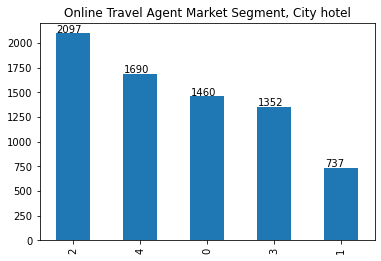

In [141]:
# The volume of each cluster 
online_city_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Online Travel Agent Market Segment, City hotel')

In [142]:
# Stat of numerical data by mean 

online_city_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.439726,163.956849,28.226712,1.236301,2.568493,2.100000,0.209589,0.005479,0.001370,0.010274,0.003425,0.281507,0.0,130.076021,0.036301,0.847945
1,0.533243,252.716418,28.967436,1.119403,2.786974,1.979647,0.173677,0.001357,0.000000,0.008141,0.001357,0.272727,0.0,112.117259,0.016282,1.047490
2,0.278970,23.069623,22.595136,1.136385,1.943252,1.831664,0.053887,0.006199,0.006199,0.018598,0.012399,0.133524,0.0,103.204588,0.025751,0.797806
3,0.358728,35.588757,27.256657,0.960799,1.977071,2.147189,0.388314,0.007396,0.002959,0.003698,0.014053,0.212278,0.0,179.786339,0.044379,0.988905
4,0.406509,92.522485,24.719527,1.188757,2.300592,1.971598,0.070414,0.002367,0.000592,0.013018,0.000592,0.160355,0.0,113.632166,0.019527,0.834911


In [143]:
# Stat of categorical data by mode 

online_city_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,FRA,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-07-24
1,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2017-03-27
2,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-06-24
3,BB,FRA,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2016-09-16
4,BB,FRA,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-05-14


Takeaway from the city hotel online market segment:
- Cluster 3 most likely to cancel 
- This also makes sense with the mean table that puts is_cancelled at 0.54 
- Cluster 2 is least likely to cancel 

##### (B) Offline Travel Agent Market Segment 

Text(0.5, 1.0, 'Offline Travel Agent Market Segment, City hotel')

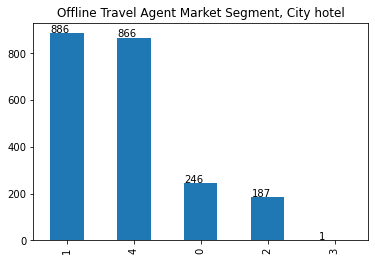

In [144]:
# The volume of each cluster 

offline_city_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Offline Travel Agent Market Segment, City hotel')

In [145]:
offline_city_df['cluster'].value_counts()

1    886
4    866
0    246
2    187
3      1
Name: cluster, dtype: int64

In [146]:
# Stat of numerical data by mean 

offline_city_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.654472,277.577236,34.044715,0.556911,1.959350,1.878049,0.000000,0.000000,0.004065,0.065041,0.000000,0.073171,45.439024,102.011585,0.000000,0.158537
1,0.388262,134.497743,26.085779,1.204289,2.436795,1.957111,0.025959,0.003386,0.001129,0.034989,0.001129,0.163657,14.972912,96.170632,0.004515,0.248307
2,0.336898,431.946524,28.737968,0.695187,1.443850,1.743316,0.000000,0.000000,0.000000,0.000000,0.000000,0.679144,0.000000,102.722995,0.000000,0.518717
3,1.000000,35.000000,13.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5400.000000,0.000000,0.000000
4,0.269053,37.583141,23.760970,1.139723,1.938799,1.845266,0.041570,0.008083,0.012702,0.039261,0.035797,0.133949,0.564665,85.246536,0.005774,0.245958


In [147]:
# Stat of categorical data by mode 

offline_city_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Canceled,2016-02-09
1,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-10
2,HB,DEU,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,2017-08-27
3,BB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,Transient,Canceled,2016-02-19
4,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-01-20


Takeaway from the city hotel offline market segment:
- Cluster 1 is most likely to cancel 
- Cluster 1 also has the most days in the waiting list 
- There is also only one entry in Cluster 4 (maybe there should have been 4 clusters for this one?)

##### (C) Direct Market Segment 

Text(0.5, 1.0, 'Direct Market Segment, City hotel')

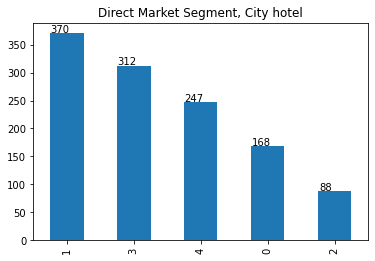

In [148]:
# The volume of each cluster 

direct_city_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Direct Market Segment, City hotel')

In [149]:
# Stat of numerical data by mean 

direct_city_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.077381,199.565476,27.190476,1.196429,2.678571,1.958333,0.345238,0.005952,0.000000,0.000000,0.005952,0.392857,0.000000,113.855060,0.059524,0.601190
1,0.148649,11.110811,27.124324,0.894595,1.600000,1.691892,0.102703,0.024324,0.043243,0.029730,0.178378,0.378378,0.000000,91.976297,0.040541,0.481081
2,0.159091,52.852273,28.784091,1.022727,2.409091,2.227273,0.954545,0.034091,0.000000,0.000000,0.000000,0.375000,0.000000,252.694432,0.159091,0.659091
3,0.163462,18.429487,28.490385,0.875000,1.721154,1.926282,0.217949,0.032051,0.019231,0.009615,0.041667,0.455128,0.000000,158.207372,0.092949,0.714744
4,0.226721,99.838057,26.251012,1.230769,2.477733,2.012146,0.141700,0.020243,0.000000,0.000000,0.004049,0.311741,0.093117,121.295425,0.024291,0.809717


In [150]:
# Stat of categorical data by mode 

direct_city_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,FRA,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2017-07-10
1,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2015-08-19
2,BB,PRT,Direct,Direct,G,G,No Deposit,Transient,Check-Out,2017-05-15
3,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2017-07-12
4,BB,FRA,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2016-01-02


Takeaway from the city hotel direct market segment:
- Overall, we can see that those who book the city hotel directly are not very likely to cancel in any of the clusters 
- This could be because of... 
- Cluster 0 of the direct market segment has a very high number of special requests 

##### (D) Group Market Segment 

Text(0.5, 1.0, 'Group Market Segment, City hotel')

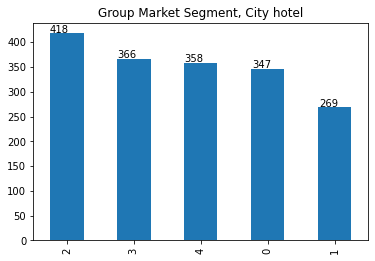

In [151]:
# The volume of each cluster 

group_city_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Group Market Segment, City hotel')

In [152]:
# Stat of numerical data by mean 

group_city_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.896254,286.769452,30.046110,0.878963,1.420749,1.962536,0.000000,0.000000,0.118156,0.772334,0.0,0.043228,3.703170,67.999712,0.0,0.118156
1,0.988848,454.434944,29.338290,0.000000,1.776952,1.940520,0.000000,0.000000,0.000000,0.074349,0.0,0.037175,0.000000,67.389591,0.0,0.011152
2,0.315789,35.588517,16.784689,0.928230,1.538278,1.504785,0.004785,0.004785,0.000000,0.011962,0.0,0.248804,0.165072,79.501579,0.0,0.198565
3,0.874317,194.825137,24.174863,0.882514,1.612022,1.923497,0.000000,0.000000,0.000000,0.027322,0.0,0.021858,0.732240,114.602322,0.0,0.079235
4,0.689944,88.893855,31.139665,1.474860,1.343575,1.606145,0.002793,0.000000,0.000000,0.075419,0.0,0.078212,13.902235,103.428659,0.0,0.008380


In [153]:
# Stat of categorical data by mode 

group_city_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Groups,TA/TO,A,A,No Deposit,Transient-Party,Canceled,2015-01-01
1,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2015-10-21
2,BB,PRT,Groups,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,2015-08-19
3,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2016-11-25
4,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2015-10-28


Takeaway from the city hotel group market segment:
- It is very clear that the group market segment is most likely to cancel 
- This could be because... 
- Cluster's 2,3 & 4 all have Non-refund deposist type so the hotel gets to keep this income and still have spare capacity 

##### (E) Corporate Market Segment 

Text(0.5, 1.0, 'Corporate Market Segment, City hotel')

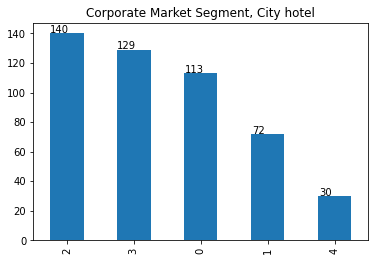

In [154]:
# The volume of each cluster 

corporate_city_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Corporate Market Segment, City hotel')

In [155]:
corporate_city_df['cluster'].value_counts()

2    140
3    129
0    113
1     72
4     30
Name: cluster, dtype: int64

In [156]:
# Stat of numerical data by mean 

corporate_city_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.079646,8.823009,7.548673,0.460177,1.035398,1.123894,0.008850,0.000000,0.389381,0.238938,3.530973,0.168142,0.265487,74.231593,0.159292,0.265487
1,0.180556,11.611111,31.069444,0.833333,2.236111,1.416667,0.013889,0.013889,0.263889,0.097222,1.597222,0.444444,0.000000,109.155000,0.055556,0.458333
2,0.564286,100.485714,11.728571,0.142857,1.128571,1.571429,0.000000,0.000000,0.050000,0.521429,0.228571,0.185714,0.000000,81.304500,0.014286,0.042857
3,0.155039,8.798450,38.124031,0.806202,1.038760,1.124031,0.000000,0.000000,0.534884,0.488372,5.434109,0.310078,0.000000,67.537984,0.124031,0.356589
4,0.066667,2.733333,35.533333,0.333333,1.533333,1.700000,0.033333,0.000000,0.066667,0.000000,0.133333,0.766667,0.000000,163.203000,0.033333,0.066667


In [157]:
# Stat of categorical data by mode 

corporate_city_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2016-02-20
1,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-08-17
2,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient-Party,Canceled,2015-12-22
3,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2016-09-20
4,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient-Party,Check-Out,2016-09-28


Takeaway from the city hotel online market segment:
- Like the offline market group, Cluster 0 is very small 
- Cluster 0 and Cluster 4 are most likely to cancel but it's more interesting to consider Cluster 4 as much more people form part of this cluster 
- Cluster 4 has a high lead time 

OTHER OVERALL THOUGHTS 
- NEED MORE CONSIDERATION ON ADR IN THE ANALYSIS 
- NEED MORE CONSIDERATION ON ARRIVAL DATE WEEK NUMBER TO FIND PATTERNS IN SEASONALITY 
- HIGH LEAD TIME LEADS TO A HIGHER CHANGES OF CANCELLING 

### RESORT HOTEL ANALYSIS 

##### (A) Online Travel Agent Market Segment 

Text(0.5, 1.0, 'Online Travel Agent Market Segment, Resort hotel')

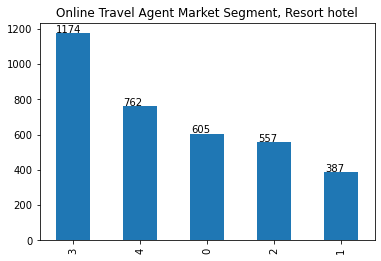

In [158]:
# The volume of each cluster 
online_resort_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Online Travel Agent Market Segment, Resort hotel')

In [159]:
# Stat of numerical data by mean 

online_resort_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.457851,129.090909,24.720661,1.580165,3.662810,1.935537,0.087603,0.016529,0.006612,0.019835,0.041322,0.271074,0.0,84.923025,0.115702,1.084298
1,0.596899,262.545220,28.322997,1.981912,4.767442,2.002584,0.201550,0.012920,0.010336,0.041344,0.007752,0.286822,0.0,118.874548,0.085271,1.090439
2,0.543986,155.484740,30.770197,1.770197,4.007181,2.057451,0.490126,0.019749,0.005386,0.001795,0.030521,0.269300,0.0,206.153375,0.120287,0.885099
3,0.198467,23.467632,22.160988,1.086882,1.954003,1.855196,0.109029,0.007666,0.032368,0.011925,0.060477,0.168654,0.0,81.578935,0.189949,0.948041
4,0.326772,36.426509,30.929134,1.202100,2.566929,2.035433,0.398950,0.015748,0.006562,0.000000,0.010499,0.248031,0.0,212.680617,0.162730,0.906824


In [160]:
# Stat of categorical data by mode 

online_resort_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-11-17
1,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2016-01-21
2,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2017-07-11
3,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-03-28
4,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-08-01


Takeaway from the resort hotel online market segment:
- Cluster's 3 and 4 are most likely to cancel 
- Both have high lead times 

##### (B) Offline Travel Agent Market Segment 

Text(0.5, 1.0, 'Offline Travel Agent Market Segment, Resort hotel')

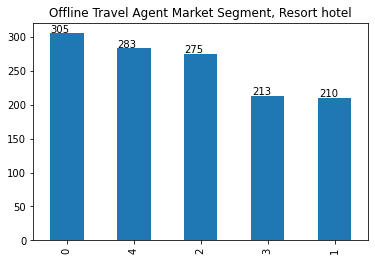

In [161]:
# The volume of each cluster 
offline_resort_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Offline Travel Agent Market Segment, Resort hotel')

In [162]:
# Stat of numerical data by mean 

offline_resort_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.042623,27.508197,25.957377,1.488525,3.242623,1.783607,0.019672,0.022951,0.026230,0.003279,0.055738,0.147541,0.00,50.606885,0.052459,0.268852
1,0.147619,278.333333,30.090476,2.561905,6.061905,1.928571,0.019048,0.009524,0.004762,0.014286,0.004762,0.190476,0.00,80.150619,0.014286,0.595238
2,0.134545,180.792727,31.527273,2.236364,4.898182,2.094545,0.090909,0.032727,0.014545,0.010909,0.018182,0.240000,0.04,128.335855,0.058182,0.567273
3,0.206573,69.661972,31.948357,2.140845,5.023474,2.056338,0.131455,0.023474,0.000000,0.000000,0.000000,0.173709,0.00,147.414554,0.089202,0.539906
4,0.134276,136.208481,27.063604,2.113074,5.021201,1.943463,0.007067,0.010601,0.014134,0.021201,0.021201,0.190813,0.00,66.164700,0.045936,0.561837


In [163]:
# Stat of categorical data by mode 

offline_resort_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-12-29
1,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Contract,Check-Out,2016-09-09
2,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-08-04
3,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-08-29
4,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-06-30


Takeaway from the resort hotel offline market segment:
- For offline market segment in the city hotel, there was one cluster that had ~65% cancellation rate
- However, for the offline market segment in the resort hotel, the cancel rates are all low 

##### (C) Direct Market Segment 

Text(0.5, 1.0, 'Direct Market Segment, Resort hotel')

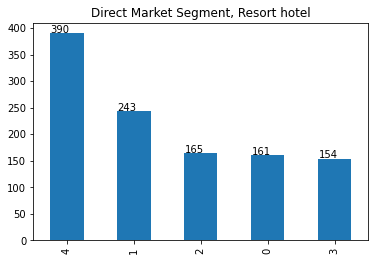

In [164]:
# The volume of each cluster 
direct_resort_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Direct Market Segment, Resort hotel')

In [165]:
# Stat of numerical data by mean 

direct_resort_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.192547,46.453416,32.633540,1.552795,3.161491,2.118012,0.453416,0.062112,0.055901,0.018634,0.086957,0.658385,0.000000,254.493602,0.329193,0.844720
1,0.131687,13.024691,28.456790,0.979424,1.975309,1.975309,0.201646,0.024691,0.057613,0.024691,0.160494,0.386831,0.032922,152.536337,0.316872,0.621399
2,0.175758,113.193939,27.636364,1.848485,4.242424,1.981818,0.236364,0.048485,0.060606,0.036364,0.254545,0.630303,0.739394,129.537394,0.327273,0.836364
3,0.318182,222.746753,30.350649,2.012987,4.519481,2.077922,0.402597,0.051948,0.064935,0.006494,0.123377,0.597403,0.000000,174.762273,0.285714,0.980519
4,0.066667,10.292308,18.948718,0.815385,1.497436,1.756410,0.056410,0.017949,0.138462,0.010256,0.253846,0.343590,0.000000,64.705641,0.235897,0.405128


In [166]:
# Stat of categorical data by mode 

direct_resort_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Direct,Direct,F,F,No Deposit,Transient,Check-Out,2017-08-08
1,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2017-06-11
2,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2015-08-22
3,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2016-07-30
4,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2017-01-30


Takeaway from the resort hotel direct market segment:
- Like in city hotels, customers who book directly are not likely to cancel their reservation 

##### (D) Group Market Segment 

Text(0.5, 1.0, 'Group Market Segment, Resort hotel')

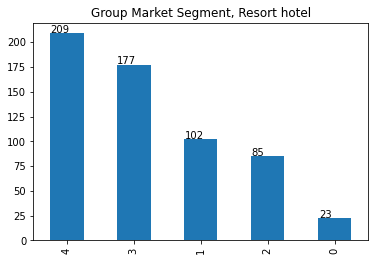

In [167]:
# The volume of each cluster 
group_resort_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Group Market Segment, Resort hotel')

In [168]:
# Stat of numerical data by mean 

group_resort_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.217391,64.043478,32.565217,1.739130,2.217391,1.347826,0.000000,0.0,0.000000,0.000000,0.000000,0.173913,0.000000,159.652174,0.086957,0.000000
1,0.352941,239.745098,25.490196,1.754902,4.343137,1.784314,0.000000,0.0,0.009804,0.166667,0.009804,0.264706,0.078431,82.209706,0.000000,0.117647
2,0.117647,332.423529,38.376471,0.976471,3.000000,1.670588,0.000000,0.0,0.000000,0.000000,0.000000,0.847059,0.000000,63.736471,0.152941,0.011765
3,0.220339,35.389831,9.361582,1.101695,2.067797,1.158192,0.000000,0.0,0.016949,0.000000,0.011299,0.474576,0.000000,58.032542,0.039548,0.180791
4,0.622010,124.277512,19.066986,1.382775,3.162679,1.784689,0.009569,0.0,0.000000,0.000000,0.009569,0.287081,1.004785,58.154593,0.009569,0.038278


In [169]:
# Stat of categorical data by mode 

group_resort_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Groups,Corporate,A,A,No Deposit,Transient-Party,Check-Out,2015-08-17
1,HB,GBR,Groups,TA/TO,D,D,No Deposit,Transient-Party,Check-Out,2017-06-30
2,BB,GBR,Groups,Direct,A,A,No Deposit,Transient-Party,Check-Out,2016-09-18
3,Undefined,PRT,Groups,Direct,A,A,No Deposit,Transient-Party,Check-Out,2017-01-19
4,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2015-06-26


Takeaway from the resort hotel group market segment:
- Cluster 1 and Cluster 2 are most likely to cancel from the group market segment 
- These clusters have seasonal difference, with Cluster 1 averaging in September and Cluster 2 averaging in March 

##### (E) Corporate Market Segment 

Text(0.5, 1.0, 'Corprate Market Segment, Resort hotel')

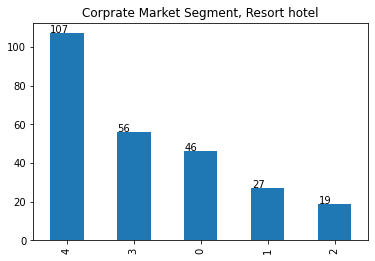

In [170]:
# The volume of each cluster 
corporate_resort_df['cluster'].value_counts().plot(kind='bar')
# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Corprate Market Segment, Resort hotel')

In [171]:
# Stat of numerical data by mean 

corporate_resort_df.groupby(['cluster']).mean()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
cluster,,,,,,,,,,,,,,,,
0,0.217391,6.065217,26.304348,0.739130,2.043478,1.391304,0.021739,0.0,0.239130,0.173913,2.478261,0.304348,0.0,85.604348,0.152174,0.217391
1,0.481481,13.555556,30.518519,0.703704,1.407407,1.518519,0.000000,0.0,0.111111,0.074074,0.555556,0.111111,0.0,160.703704,0.074074,0.222222
2,0.789474,57.736842,26.210526,1.842105,4.578947,1.842105,0.000000,0.0,0.052632,0.000000,0.315789,0.210526,0.0,100.736842,0.052632,0.157895
3,0.303571,16.178571,45.928571,1.714286,4.196429,1.160714,0.000000,0.0,0.178571,0.071429,0.482143,0.696429,0.0,38.848750,0.071429,0.017857
4,0.121495,7.401869,8.084112,0.607477,1.074766,1.130841,0.000000,0.0,0.457944,0.102804,2.598131,0.308411,0.0,37.497664,0.093458,0.177570


In [172]:
# Stat of categorical data by mode 

corporate_resort_df.groupby(['cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date']]

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
cluster,,,,,,,,,,
0,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-10-09
1,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2017-07-12
2,BB,PRT,Corporate,Corporate,D,D,No Deposit,Transient,Canceled,2017-05-12
3,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-10-10
4,BB,PRT,Corporate,Corporate,A,D,No Deposit,Transient,Check-Out,2017-01-13


Takeaway from the resort hotel corporate market segment:
- Cluster 1 is most likely to cancel  
- Cluster 1 has the highest lead time 

### Example of PCA cluster visualtion 

In [173]:
!pip install -U scikit-learn

     |████████████████████████████████| 8.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 6.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [183]:
# Load libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import gower

# kmodes can only be run on categorical data 
# k prototypes is used to run a mixture of numerical and categorical data
from kmodes.kprototypes import KPrototypes 
from kmodes.kmodes import KModes

In [175]:
# Load the numerical dataset for the city and resort hotel data 
n_city_df = pd.read_csv("numerical_city_hotel_data.csv")
n_resort_df = pd.read_csv("numerical_resort_hotel_data.csv")

In [176]:
# City hotel 
# Group by market segment 

online_n_city_df = n_city_df.groupby('market_segment_Online TA')
online_n_city_df = online_n_city_df.get_group(1)

offline_n_city_df = n_city_df.groupby('market_segment_Offline TA/TO')
offline_n_city_df = offline_n_city_df.get_group(1)

group_n_city_df = n_city_df.groupby('market_segment_Groups')
group_n_city_df = group_n_city_df.get_group(1)

direct_n_city_df = n_city_df.groupby('market_segment_Direct')
direct_n_city_df = direct_n_city_df.get_group(1)

corporate_n_city_df = n_city_df.groupby('market_segment_Corporate')
corporate_n_city_df = corporate_n_city_df.get_group(1)

In [177]:
# Resort hotel 
# Group by market segment 

online_n_resort_df = n_resort_df.groupby('market_segment_Online TA')
online_n_resort_df = online_n_resort_df.get_group(1)

offline_n_resort_df = n_resort_df.groupby('market_segment_Offline TA/TO')
offline_n_resort_df = offline_n_resort_df.get_group(1)

group_n_resort_df = n_resort_df.groupby('market_segment_Groups')
group_n_resort_df = group_n_resort_df.get_group(1)

direct_n_resort_df = n_resort_df.groupby('market_segment_Direct')
direct_n_resort_df = direct_n_resort_df.get_group(1)

corporate_n_resort_df = n_resort_df.groupby('market_segment_Corporate')
corporate_n_resort_df = corporate_n_resort_df.get_group(1)

In [184]:
# Define a function that can create a visual of the clusters for the dataframe 
# Inputs: df = the numerical dataframe, grouped by hotel type and then market segment 
# df_2 = the categorical dataframe, grouped by hotel type and then market segment

def create_pca_vis(df, df_2):

    pca = PCA(2)
    
    #Transform the data 
    df = pca.fit_transform(df)
    df = pd.DataFrame(df) 

    # Transforming it to pandas data frame data type
    df.columns = [df.add_prefix('PC_')]
    df.head()
    
    # Create a dataset of only the clusters 
    cluster_df = df_2['cluster']
    
    # Reset the row indices 
    cluster_df = cluster_df.reset_index()
    
    # Combine this dataset with the clustering predictions using the k-prototype algorithm 
    df_pca_cluster = pd.concat([cluster_df, df], axis=1)
    df_pca_cluster.columns.values[-2: ] = ['Component 1', 'Component 2']
    
    # Create the graph 
    x_axis = df_pca_cluster['Component 2']
    y_axis = df_pca_cluster['Component 1']
    plt.figure(figsize = (10,8))
    sns.scatterplot(x_axis, y_axis, palette = "bright", hue = df_pca_cluster['cluster'])
    return  plt.show

/Users/kayleedekker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'City Hotel, Online TA Market Segment by Clusters using PCA')

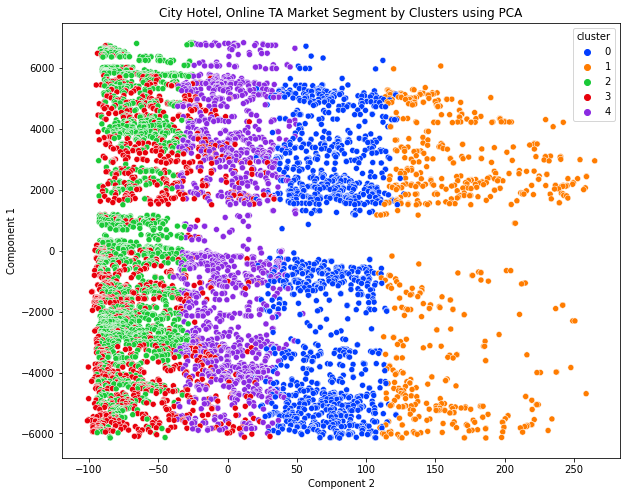

In [185]:
# Use the function to create the visual of the clusters 
# Add the indiviudal title 
create_pca_vis(online_n_city_df, online_city_df)
plt.title('City Hotel, Online TA Market Segment by Clusters using PCA')

/Users/kayleedekker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Resort Hotel, Online TA Market Segment by Clusters using PCA')

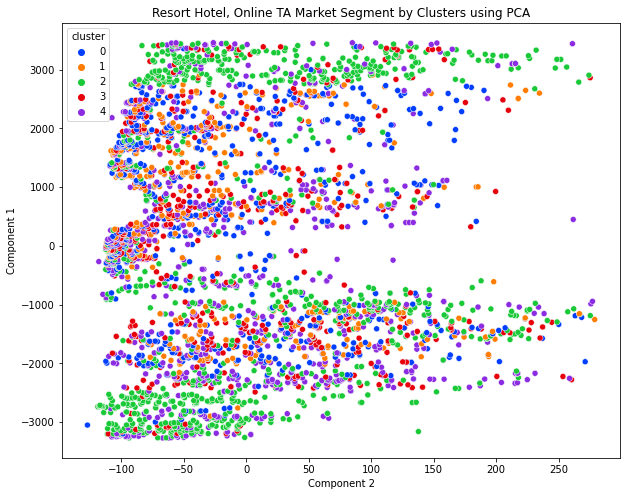

In [186]:
# Use the function to create the visual of the clusters 
# Add the indiviudal title 

create_pca_vis(online_n_resort_df, online_city_df)
plt.title('Resort Hotel, Online TA Market Segment by Clusters using PCA')